# Loan Approval Prediction System


**Table of Contents** <a id="top"></a>

1. [Part 1: Introduction](#1.1) <br>
    1.1 [Data Dictionary](#1.1.1) <br>
    1.2 [Data Loading](#1.1.2) <br> 
    1.3 [Summary Statistics of Dataset](#1.1.3) <br>
    
2. [Part 2 : Data Cleaning](#1.2) <br>
    2.1 [Unique values](#1.2.1) <br>
    2.2 [Target Variable](#1.2.2) <br>
    2.3 [Duplicates](#1.2.3) <br>
    2.4 [Null Values](#1.2.4) <br>
    2.5 [Feature Engineerings](#1.2.5) <br>
    2.6 [Drop Non-essential features](#1.2.6) <br>
    
3. [Part 3: Exploratory Data Analysis](#1.3) <br>
    3.1 [Numerical Columns](#1.3.1) <br>
    3.2 [Univariate Distribution](#1.3.2) <br>
    3.3 [Box Plots of Numerical Features grouped by Loan Status](#1.3.3) <br>
       
4. [Part 4: Modeling](#1.4) <br>
    4.1 [Train/Test Split and Scaling](#1.4.1) <br>
    4.2 [Baseline Modeling - Logistic Regression](#1.4.3) <br>
    4.3 [Upsampling with SMOTE](#1.4.3) <br>
    4.4 [Logistic Regression](#1.4.4) <br>
    4.5 [Decision Trees](#1.4.5) <br>
    4.6 [XGBoost](#1.4.6) <br>
    4.7 [CatBoost](#1.4.7) <br>
    4.8 [Pipeline and GridSearchCV](#1.4.8) <br>
    4.9 [Hyper-parameter Tuning](#1.4.9) <br>   
    
5. [Advanced Modeling with Recall Score](#1.5) <br>
    5.1 [Recall Scores with best models from GridSearchCV](#1.6.1) <br>
    5.2 [XGBoost](#1.5.2) <br>
    5.3 [CatBoost](#1.5.3) <br>
    5.4 [Decision Trees](#1.5.4) <br>
    5.5 [Logistic Regression](#1.5.5) <br>
    5.6.[Model Coefficients - Logistics Regression](#1.5.6) <br>
    5.7 [Neural Networks](#1.5.7) <br>
    
6. [Conclusion](#1.6) <br>
7. [Next Steps](#1.7) <br>
    

## Introduction to P2P Lending
Peer-to-peer lending (P2P) originated in the UK in 2005 and quickly expanded to the US by 2006-07, with companies like Lending Club leading the way. The onset of the 2008 financial crisis caused traditional credit markets to falter, prompting a surge in P2P lending due to a crisis of confidence in conventional financial institutions. Lending Club emerged as the world's largest P2P lender, reaching assets of around $16 billion by 2015-16. In recent years, many P2P lenders, including Lending Club, have transitioned from pure P2P lending to offering a broader array of digital financial services.

**What is P2P Lending?**
P2P lending facilitates direct borrowing and lending between individuals through online platforms, bypassing traditional financial intermediaries like banks. Borrowers submit loan requests, which investors can then fund in exchange for investment returns, facilitated entirely through P2P platforms.

**How can Data Science help Lending Club?**
Lending Club, a prominent P2P lending platform, provides personal and small business loans. Lending Club made its loan dataset publicly available to assist investors in deciding whether to invest in particular loan asset, based on the loan features. This project focuses on developing a predictive model using data science techniques to forecast loan repayment based on borrower attributes and loan attributes.

**Business Problem and Solution**: While providing lending services, , delays in loan approval processes often lead to unhappy customers and the risk of losing potential customers to competitors. An instant loan approval prediction or loan performance prediction application can benefit borrowers and lenders, improving customer experience and increasing lender efficiency. Such a system, powered by machine learning models trained on historical loan performance data, can provide speedy preliminary loan offers, which is particularly beneficial for consumers, small businesses, and commercial borrowers.

**Project Objective**: 
With the ultimate objective of improving lending efficiency and customer satisfaction, this project aims to
* Explore the data in the dataset
* Demonstrate the steps for data cleaning,
* Perform exploratory data analysis and
* Prepare data for modeling by preprocessing 
* Apply baseline and advanced machine learning models to predict loan performance
* Evaluate the model performance.
* Develop an application to demonstrate the prediction of instant loan approval.


### Data-Dictionary

| S.No | Column Name           | Description                                                                                                 |
|------|-----------------------|-------------------------------------------------------------------------------------------------------------|
| 0    | loan_amount           | The listed amount of the loan in USD applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.|
| 1    | term                  | The number of payments on the loan. Values are in months and can be either 36 or 60.                          |
| 2    | int_rate              | Interest Rate on the loan                                                                                    |
| 3    | installment           | The monthly payment owed by the borrower                                                                    |                                           
| 4    | grade                 | Lending Club assigned loan grade                                                                                      |
| 5    | sub_grade             | Lending Club assigned loan subgrade                                                                                   |
| 6    | emp_title             | The job title supplied by the Borrower when applying for the loan.                                          |   
| 7    | emp_length            | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.|
| 8    | home_ownership        | The homeownership status provided by the borrower during registration or obtained from the credit report. The values are: RENT, OWN, MORTGAGE, OTHER|
| 9    | annual_inc            | The self-reported annual income provided by the borrower during registration.                                 |
| 10   | verification_status   | Indicates if income was verified by LC, not verified, or if the income source was verified                    |
| 11   | issue_d               | The month which the loan was funded                                                                         |
| 12   | loan_status           | Current status of the loan                                                                                 |
| 13   | purpose               | A category provided by the borrower for the loan request.                                                   |
| 14   | title                 | The loan title provided by the borrower                                                                    |
| 15   | zip_code              | The first 3 numbers of the zip code provided by the borrower in the loan application.                         |
| 16   | addr_state            | The state provided by the borrower in the loan application                                                  |
| 17   | dti                   | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.|
| 18   | earliest_cr_line      | The month the borrower's earliest reported credit line was opened                                            |
| 19   | open_acc              | The number of open credit lines in the borrower's credit file.                                               |
| 20   | pub_rec               | Number of derogatory public records                                                                        |
| 21   | revol_bal             | Total credit revolving balance                                                                             |
| 22   | revol_util            | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.|
| 23   | total_acc             | The total number of credit lines currently in the borrower's credit file                                     |
| 24   | initial_list_status   | The initial listing status of the loan. Possible values are – W, F. W stands for Whole loan and F stands for fractional.                                           |
| 25   | application_type      | Indicates whether the loan is an individual application or a joint application with two co-borrowers         |
| 26   | mort_acc              | Number of mortgage accounts.                                                                               |
| 27   | pub_rec_bankruptcies  | Number of public record bankruptcies 

### Data Loading

In [5]:
#Import the required libraries

import numpy as np # Linear alzebra
import pandas as pd # Data manipulation

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import hvplot.pandas 

# import library to filter warnings
import warnings
warnings.filterwarnings('ignore')

* Numpy and Pandas are core libraries for working with Data. 
* Similarly, Matplotlib.pyplot and Seaborn are standard libraries for Visualisation. 
* Plotly.express and hvplot.pandas are used for generating interactive plots.

In [6]:
# read CSV using pandas and name data fram as raw_df
raw_df = pd.read_csv("lending_club_loan_two.csv")

The dataset for obtained from Kaggle. This dataset has more than 3 million observations of loan performance data spread over 2008 to 2016. All the observations are records of past observation data and there are no observations of any ongoing loans.

In [7]:
# Check for the size of the dataset
raw_df.shape

(396030, 27)

With a size of 396030 rows and 27 columns, the dataset is large enough to extract meaningful patterns and build ML models and small enough to process using personal computing resources.

In [8]:
# Change the default pandas dataframe display option to enable viewing all columns of the dataframe
pd.set_option('display.max_columns', None) 

This option is enabled to view all the columns in a data frame

In [9]:
# Take a glimpse of the dataframe
raw_df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


Brief look at the top rows of the data frame.

In [10]:
# Check the column names and data types
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

The info() method in Pandas helps to us inspect the dataframe's column names, the count of non-null values in each column, and their respective data types.

**Feature Engineering**: 
1. New columns `month` and `year` could be extracted from `issue_d` column  
2. New columns `city`, `state` and `pincode` could be extracted from `address` column 
3. New column `inc_by_loan` = (`annual_inc`)/(`loan_amnt`) could be calculated.
4. New column `debt` = `dti` * `annual_inc` could be calculated


### Summary Statistics of Dataset

In [11]:
# Calculate brief summary statistics
raw_df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14114.0,8357.0,500.0,8000.0,12000.0,20000.0,40000.0
int_rate,396030.0,14.0,4.0,5.0,10.0,13.0,16.0,31.0
installment,396030.0,432.0,251.0,16.0,250.0,375.0,567.0,1534.0
annual_inc,396030.0,74203.0,61638.0,0.0,45000.0,64000.0,90000.0,8706582.0
dti,396030.0,17.0,18.0,0.0,11.0,17.0,23.0,9999.0
open_acc,396030.0,11.0,5.0,0.0,8.0,10.0,14.0,90.0
pub_rec,396030.0,0.0,1.0,0.0,0.0,0.0,0.0,86.0
revol_bal,396030.0,15845.0,20592.0,0.0,6025.0,11181.0,19620.0,1743266.0
revol_util,395754.0,54.0,24.0,0.0,36.0,55.0,73.0,892.0
total_acc,396030.0,25.0,12.0,2.0,17.0,24.0,32.0,151.0


Pandas' describe() method allows us to view the statistical summary of the various columns. 'T' stands for transpose and is used for better readability of the summarised results.

1. **loan_amount**: The average loan amount per borrower is approximately USD 14,000. The minimum loan amount is USD 500 and the maximum is USD 40,000. The standard deviation of USD 8,357 indicates the spread of values around the mean of USD 14000. So, most of the values of loan amounts lie between USD 6,000 and USD 22,000. Median of USD 12,000 suggests right skew in distribution.

2. **int_rate**:	Typical rate of interest on the loan is ~14%, with most values in the range of 10% to 18%. The median of 13% is close to the mean value.

3. **annual_income**: The average annual income of borrower is approximately USD 74,000. Standard deviation of USD 61,000 implies that spread of income values around the mean is high. Maximum income of USD 8,796,582 may indicate presence of outliers.

4. **dti**: 'dti' stands with debt to income. Average dti is 17.0. Standard deviation of 18.0 indicates high spread of data. Maximum dti is 9999 suggests presence of outliers or possibly incorrect values.

5. In other columns, we also notice presence of extreme values towards the end of higher values. 

This indicates issues with data quality. 

In this notebook, we will be using log transformation to handle extreme values. Ideally, we could sort the dataframe on each column and inspect the values to either remove the corresponding rows, or impute extreme values with mean values or less extreme values. 

While the data quality affects the data analysis and visualisation, by using log transformation on columns with data quality issues, it is possible to achieve good model prediction performance.


In [12]:
# Inspect the extreme values in the data frame by sorting on numerical columns.

raw_df.sort_values("annual_inc", ascending = False).sample(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
350948,9000.0,36 months,13.85,306.94,C,C4,KB Home,< 1 year,RENT,43000.0,Not Verified,Feb-2010,Fully Paid,debt_consolidation,Debt Consolidation - Strong Income,24.00,Sep-2003,4.0,0.0,9170.0,90.8,10.0,f,INDIVIDUAL,NaN,0.0,"590 Vargas Village Apt. 257\r\nEast Nicholas, ..."
215582,10000.0,36 months,13.33,338.54,C,C3,Executive Chef,< 1 year,OWN,70000.0,Source Verified,Aug-2015,Fully Paid,other,Other,13.61,Apr-2002,14.0,1.0,3554.0,65.8,17.0,f,INDIVIDUAL,1.0,1.0,24016 Anderson Spurs Apt. 531\r\nRonaldchester...
176430,10750.0,36 months,12.35,358.86,B,B4,Pottery Barn,2 years,MORTGAGE,55000.0,Not Verified,Jul-2013,Fully Paid,other,401K Loan Repayment,22.08,Apr-1998,13.0,0.0,16357.0,39.1,32.0,f,INDIVIDUAL,2.0,0.0,"PSC 4062, Box 4193\r\nAPO AP 70466"
134353,18000.0,36 months,11.55,594.00,B,B3,The Zimmerman Agency,10+ years,MORTGAGE,92500.0,Verified,Sep-2013,Fully Paid,debt_consolidation,Debt consolidation,15.70,Mar-1991,12.0,0.0,20953.0,97.9,33.0,f,INDIVIDUAL,8.0,0.0,"39078 Willis Turnpike\r\nStephanieburgh, AK 70466"
319456,24000.0,60 months,23.83,688.07,F,F5,"Dallas Phones, LLC",5 years,MORTGAGE,70000.0,Verified,Oct-2012,Fully Paid,debt_consolidation,Paying Off Debt For A Fresh Start,33.11,Sep-2004,18.0,0.0,16137.0,97.8,33.0,f,INDIVIDUAL,4.0,0.0,"9534 Thomas Club Apt. 949\r\nNorth Erikaville,..."


* In the above case, we sorted the table on the column of annual income. We could similarly sort by other numerical columns. 

* This technique allows us to observe the outliers and extreme values. 

* In this notebook, we will be using a different technique called 'log transformation' to handle outliers. We will see this in the section on Explorate Data Analysis.

## Data Cleaning

Following are the steps we shall perform in Data Analysis

1. **Check for number of unique values in categorical columns** (Identify percentage of unique values in each categorical column. Any column with a large percentage of unique values prevents us from analysing the data meaningfully, and encoding the data into numbers. If a categorical column has large number of unique values, we have a few simple options to consider. 
    a) Drop the column 
    b) Create another category called other)      
2. **Encode the target variable** (If the target column is categorical, we could encode into numeric column. In this notebook, we encode the target variable as part of 'Data Cleaning'. We shall encode the other numeric columns during Preprocessing phase)
3. **Handling any duplicate rows in the dataset**
4. **Identify and Handle missing data**
5. **Feature Engineering**
6. **Dropping non-essential features to simplify modeling**

### Unique values

In [13]:
# Calculate the number of unique values for each categorical column 
# Then sort these columns in descending order of number of unique values.

raw_df.select_dtypes("object").nunique().sort_values(ascending = False)

address                393700
emp_title              173105
title                   48817
earliest_cr_line          684
issue_d                   115
sub_grade                  35
purpose                    14
emp_length                 11
grade                       7
home_ownership              6
verification_status         3
application_type            3
term                        2
loan_status                 2
initial_list_status         2
dtype: int64

**Observations**

* In the above table, the top 6 columns could be considered for deletion.
* `address`:  About 99% of addresses are unique, implying that 99% of the borrowers are unique. We could drop this column. However, we notice that the `address` column has some valuable attributes for analysis. We could extract the values `city`, `state` and `pin code` from `address` column. Therefore, we shall keep the address column in place till we extract useful information and then drop the `address` column.
* `emp_title`: 46% percent of employee titles are unique. The column seems to have been filled by the borrowers in a request form, with no data validation measures in place. This may have resulted in large number of employee title values. Similar to `address`, the `emp_title` column is not useful for analysis, and we shall drop this column. 
* `title`, `earliest_cr_line`,`issue_d` and `sub_grade` are considered for deletion. We shall revisit this handling of these columns in the section of 'dropping non-essential' features.

In [14]:
# Drop column 'emp_title'
raw_df = raw_df.drop(columns = ['emp_title'])

### Target Variable

For this dataset, `loan_status` is the target variable. 
Let us inspect the unique values in the target variable.

In [15]:
raw_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

* The unique values for column `loan_status` are 'Fully Paid' and 'Charged Off'. 

* 'Fully Paid' signifies that the borrower has repaid the loan in full. 'Charged Off' indicates that the borrower had not repaid the full amount of loan , and a portion of the loan had been written off.

* In order to perform statistical analysis, we shall represent these strings numerically. In this notebook, we assign the number 1 to 'Charged Off' as this is the value of interest to us, and we assign the number 0 to 'Fully Paid'.

In [16]:
# Define a mapping dictionary
mapping = {'Fully Paid': 0, 'Charged Off': 1}

# Apply the mapping dictionary to 'loan_status' column using map() 
raw_df['loan_status_num'] = raw_df['loan_status'].map(mapping)

In the above code, we encoded the string value of `loan_status` into numeric values in the new column `loan_status_num`. 

For now, we retain both the columns `loan_status` and `loan_status_num` for ease of analysis. Later on, we shall drop the column `loan_status` as we perform encoding on all the numeric columns.

### Duplicates in the dataset

In [17]:
# check for duplicate rows
raw_df.duplicated().sum() 

0

We observe there are no duplicate rows in the dataset.

### Null Values (or Missing Values)

In this notebook, strategies employed to handle with null values or missing values are as under

1. Remove columns
2. Remove rows
3. Imputation with a statistical measure such as mean.

In [18]:
# Count nulls in column and sort in descending order
columns_null_count = raw_df.isnull().sum().sort_values(ascending = False)

# Calculate percentage of nulls in the column
columns_percent_nulls = columns_null_count * 100 / raw_df.shape[0]

# Filter columns with non-zero null count 
columns_percent_nulls[columns_percent_nulls != 0].round(1)


mort_acc                9.5
emp_length              4.6
title                   0.4
pub_rec_bankruptcies    0.1
revol_util              0.1
dtype: float64

 **Observations:** 
 
 * The above listed columns contain nulls.
 * Column `mort_acc` has 9.5% of its values as null. 
 * Column `emp_length` has 4.6% of its values as null.
 * Column `title` has 0.4% of its values as null.
 * Columns `revol_util` and `pub_rec_bankruptcies` have a small percentage nulls

**Handle Null Values**
* Columns `revol_util` and `pub_rec_bankruptcies` have low percentage of null values. We may remove the rows with null values in these columns. 
* There are null values in columns emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies. These nulls have to handled appropriately.

**a. Null values in `revol_util` and `pub_rec_bankruptcies`**

In [19]:
# Use dropna()method to drop rows with NA values in columns `revol_util` and `pub_rec_bankruptcies`
raw_df = raw_df.dropna(subset=['revol_util', 'pub_rec_bankruptcies'])

We have removed the rows with NA values in columns `revol_util` and `pub_rec_bankruptcies`. 

**b. Null values in `emp_length`**

In [20]:
# Number of unique values in emp_length
print(f"Column `emp_length` has {raw_df['emp_length'].nunique()} unique values \n") 

# List the categories of unique values in emp_length
print(f"The categories are as under: \n\n {raw_df['emp_length'].unique()}")

Column `emp_length` has 11 unique values 

The categories are as under: 

 ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]


`emp_length` has 4.6% of null values. By removing the corresponding rows, we may lose important patterns in data. Let's examine how the distribution of `loan_status` is with respect to various categories of `emp_length` to understand how the distribution changes.

We use crosstab approach to understand this.

loan_status_num     0     1
emp_length                 
1 year           0.80  0.20
10+ years        0.82  0.18
2 years          0.81  0.19
3 years          0.80  0.20
4 years          0.81  0.19
5 years          0.81  0.19
6 years          0.81  0.19
7 years          0.81  0.19
8 years          0.80  0.20
9 years          0.80  0.20
< 1 year         0.79  0.21


<Axes: xlabel='emp_length'>

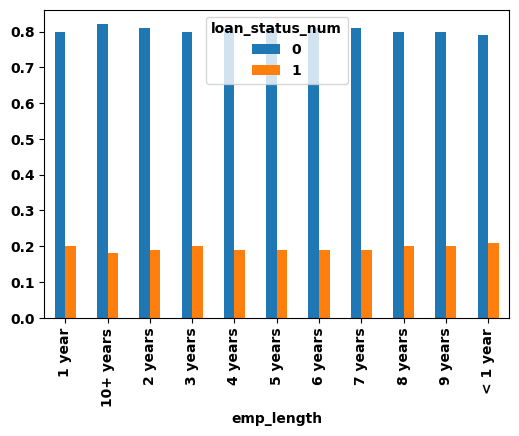

In [21]:
# Make a simple cross tabulation of 'emp_length' and 'loan_status'. 
cross_tab = pd.crosstab(index=raw_df['emp_length'], columns=raw_df['loan_status_num'], normalize='index').round(2)

# print normalised porportions
print(cross_tab)

cross_tab.plot(kind = 'bar', figsize = (6,4))

In the above bar plot, we observe that distribution of target variable `loan_status_num` for each category of `emp_length`. For all categories, we distribution follows distribution is 80:20

Let us now check, whether the `emp_length` column has any correlation to target variable `loan_status_num`. To perform correlation, we need columns to be numeric and so, we create a new numeric column called `emp_length_numeric` from existing column `emp_length`. 

In [22]:
raw_df['emp_length_numeric'] = raw_df['emp_length'].map({
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
    None: None  # to handle NaN values
})

In [23]:
#  Check correlation between emp_length_numeric','emp_length'
raw_df[['emp_length_numeric','loan_status_num']].corr()

,emp_length_numeric,loan_status_num
emp_length_numeric,1.000000,-0.013805
loan_status_num,-0.013805,1.000000


We see correlation of almost zero. This means there is no impact of feature `emp_length` on `loan_status`. Therefore, we may proceed to remove the column `emp_length`

In [24]:
# Drop columns emp_length_numeric','emp_length'
raw_df = raw_df.drop(columns = ['emp_length_numeric','emp_length'])

The drop method is used remove columns in data frame.

**c. Null values in `title`**

In [25]:
# Count the null values in column 'title'
print(f'Number of nulls in column "title" is {raw_df["title"].isnull().sum()}')

# Calculate the top 5 most frequently ocurring categories in column 'title'
raw_df['title'].value_counts()[:5] 

Number of nulls in column "title" is 1754


Debt consolidation         152392
Credit card refinancing     51476
Home improvement            15245
Other                       12910
Debt Consolidation          11584
Name: title, dtype: int64

It looks like there are many redundant categories. For instance, Debt consolidation is captured under multiple categories. We could merge similar categories to reduce the number of categories. 

Before we work on this column, let us look at the `title` column and compare with another column `purpose`.

In [26]:
raw_df[['purpose','title']].head()

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance


We observe that it has values similar to the purpose column. Infact, the `purpose` appears to have input validation control and `title` has custom text. We proceed to remove the `title` column.

In [27]:
#drop column 'title'
raw_df = raw_df.drop(columns = ['title'])

**d. Null values in `mort_acc`**

Let us find the correlation between feature and target variable.

In [28]:
# Find correlation between 'loan_status_num' and 'mort_acc'
raw_df[['mort_acc','loan_status_num']].corr()

,mort_acc,loan_status_num
mort_acc,1.000000,-0.073048
loan_status_num,-0.073048,1.000000


Low correlation is observed. However, low correlation alone is not sufficient cause to drop the column of `mort_acc`

Let us check if `mort_acc` has high correlation with other input features.

In [29]:
# Find correlation values between `mort_acc` and other input features.

raw_df.select_dtypes("number").corr()['mort_acc'].round(1).sort_values(ascending=False)

mort_acc                1.0
total_acc               0.4
loan_amnt               0.2
installment             0.2
annual_inc              0.2
revol_bal               0.2
open_acc                0.1
dti                    -0.0
pub_rec                 0.0
revol_util              0.0
pub_rec_bankruptcies    0.0
int_rate               -0.1
loan_status_num        -0.1
Name: mort_acc, dtype: float64

`total_acc` has moderate correlation with `mort_acc`, but not too high. If it is closed to 1, then we could have dropped one of the columns.

In [30]:
# Find the most freuenty occuring values of `mort_acc`
raw_df['mort_acc'].value_counts()[:5]

0.0    139708
1.0     60384
2.0     49907
3.0     38022
4.0     27865
5.0     18182
Name: mort_acc, dtype: int64

Instead of dropping the column or removing the rows with null values in `mort_acc`, it may be better to fill the null values with the mean or median of the column `mort_acc`

In [31]:
# Filling nulls in column `mort_acc` with the mean value of the column
raw_df['mort_acc'].fillna(raw_df['mort_acc'].mean(), inplace=True)

In the above line of code, we used fillna() to fill the missing values in `mort_acc` column. Imputation is the process of substituting missing values.
We could use median, mode or any other fixed/variable value for imputation. 

Instead of imputing with mean value, we could have also consiered using the mean of ratio of `mort_acc`/`total_acc` and used it for imputation

In [32]:
# Check if all nulls have been removed
raw_df.isnull().sum() 

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_status_num         0
dtype: int64

We see all the nulls have been removed.

### Feature Engineering

As mentioned earlier, we shall remove `address` after extracting required information from its values

#### Extract "State" from column `address`

In [33]:
# Examine the values of 'address'
raw_df['address'].sample(5)

253847              5622 Smith Pines\r\nRobertton, WV 22690
3799      5824 Murray Isle Suite 080\r\nNicolefurt, FL 4...
291288    353 Bryant Mill Apt. 200\r\nHendersonfurt, CA ...
49847     58688 Michelle Ridges Suite 040\r\nEast Krysta...
355632                   Unit 6383 Box 3993\r\nDPO AE 70466
Name: address, dtype: object

We see that address has string format. We can use regular expessions to extract the relevant features city, state and pincode. For the purpose of this notebook, we will only extract `state` information.

In [34]:
# Import the module 're' helful for working with regular experessions
import re

# Specify regular expression format for State and City code in the address string
state_pattern = r',\s(\w{2})\s\d+'

# Extract 'state' from 'address' column of the dataframe
raw_df['state'] = raw_df['address'].str.extract(state_pattern)


raw_df['state'].head()

0    OK
1    SD
2    WV
3    MA
4    VA
Name: state, dtype: object

#### Extract "Month" and "Year" from column "issue_d" 

In [35]:
# Extracting Month and Year from issue_d
raw_df['issue_d'] = pd.to_datetime(raw_df['issue_d']) # Convert to datetime format
raw_df['month'] = raw_df['issue_d'].dt.month # Extract month
raw_df['year'] = raw_df['issue_d'].dt.year   # Extract year

**Generate Insightful Financial Ratios and Debt Metrics from Existing Numerical Data**

In [36]:
# # Calculate Annual_Income/Loan Amount
# raw_df['income_by_loan_amnt'] = raw_df['annual_inc'] / raw_df['loan_amnt']

# # Calculate Annual_Income/Interest Rate
# raw_df['income_by_int_rate'] = raw_df['annual_inc'] / raw_df['int_rate']

# # Calculate Debt using dti and Annual_Income
# raw_df['debt'] = raw_df['dti'] * raw_df['annual_inc']

# # Display the updated dataframe
# print(raw_df.head())

Although the feature engineered numerical columns have the potential for use, we have not utilized them in this context as it would necessitate the removal of the original columns (due to high correlation between constructed features and original features). As a next step for the project, we could test for these columns in the next phase of the project.

### Drop Non-Essential Features 

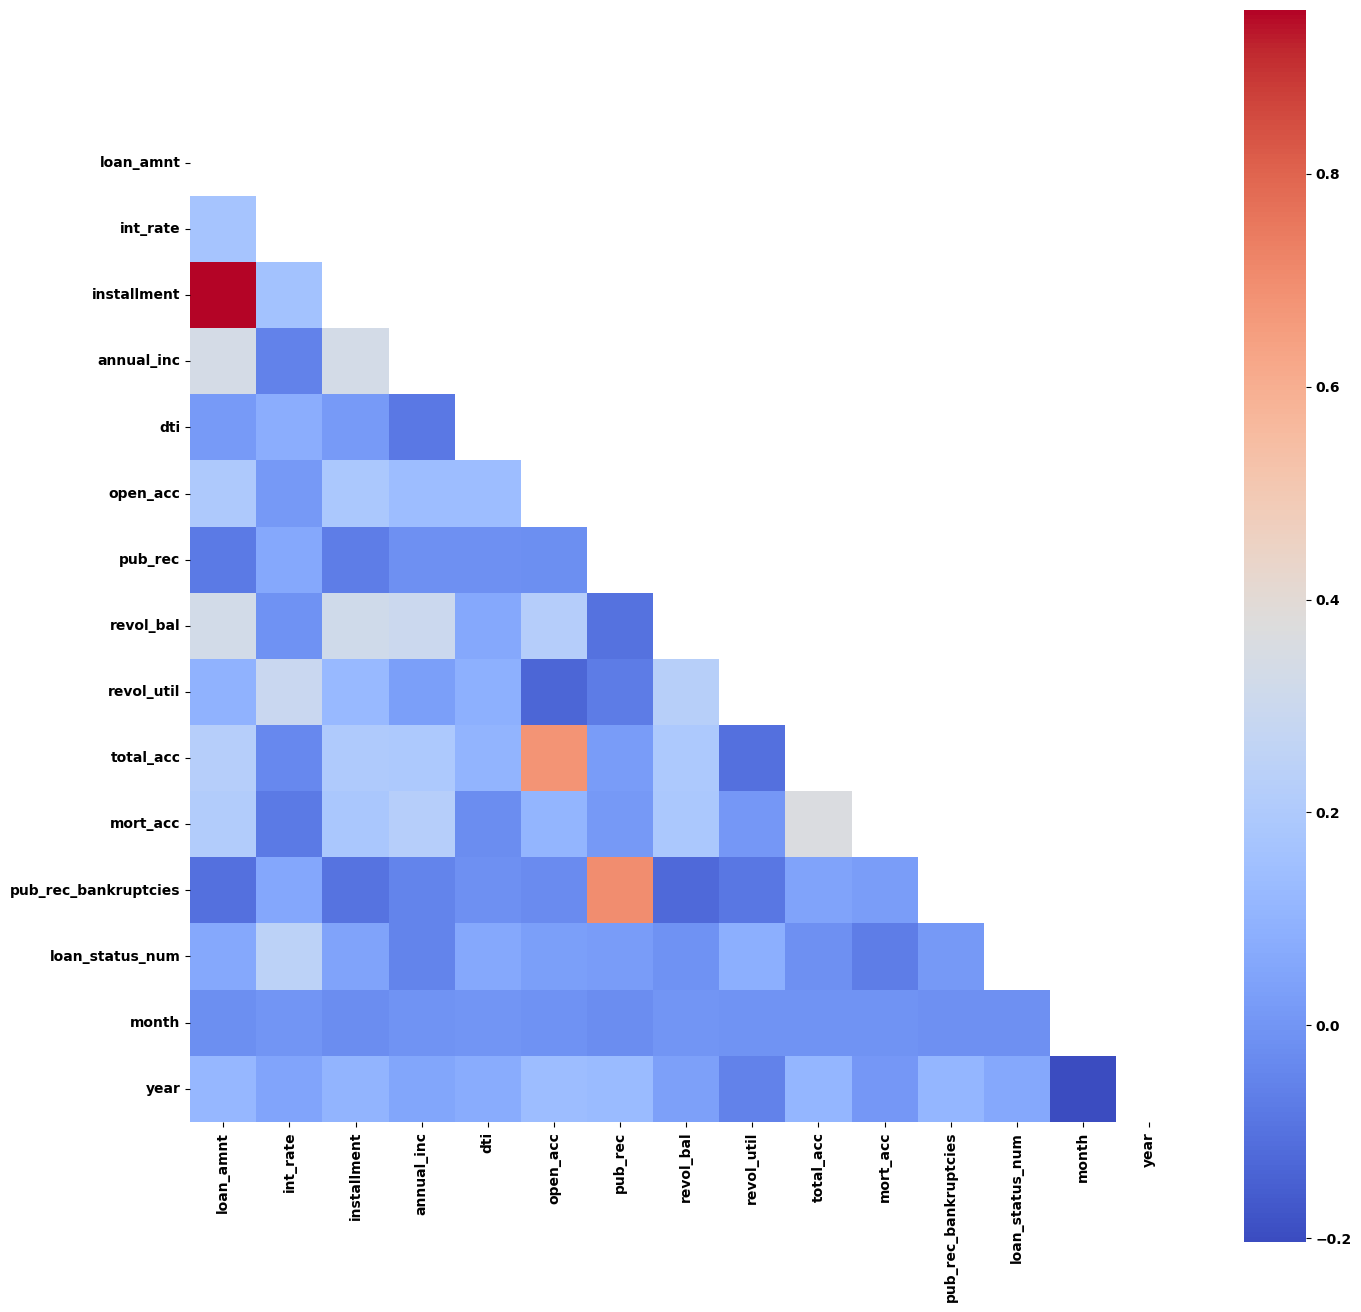

In [37]:
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(raw_df.select_dtypes("number").corr(), dtype=bool))

# Set up the figure with size
plt.figure(figsize=(16, 16))

# Draw the heatmap with the mask
sns.heatmap(data = raw_df.select_dtypes("number").corr(), cmap="coolwarm",fmt='.2f',square=True, annot=True, mask=mask)

plt.show()

With a view to reduce complexity of analysing data and optimise model performance, we could consider dropping some of the columns as below. 

1. `sub-grade`: We have alread considered `grade` as a feature. Further using sub-grade may not be helpful due to high number of sub-categories.
2. `earliest_cr_line`: From a business perspective, this feature is unlikely to have any impact on outcome variable.
3. `address`: we have already attacted the `state` information. We can drop the address column as it would not be useful for EDA.
4. `installment`: This column has high correlation with loan amount. Hence considered for removal.
5. `issue_d`: We have already extracted year and month from the column. 
6. `total_acc`: It has high correlation `open_acc`. We may drop this `total_acc`. 
7. `verification_status`: Logically, this variable has not impact on target variable.
8. `pub_rec`: This column has high correlation with `pub_rec_bankruptcies`.

In [38]:
# List out columns to be dropped
drop_columns = ['sub_grade','earliest_cr_line', 'address','installment','issue_d','total_acc','verification_status','pub_rec']

raw_df = raw_df.drop(columns = drop_columns)

In [39]:
# Check for columns remaining in data frame
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   grade                 395219 non-null  object 
 4   home_ownership        395219 non-null  object 
 5   annual_inc            395219 non-null  float64
 6   loan_status           395219 non-null  object 
 7   purpose               395219 non-null  object 
 8   dti                   395219 non-null  float64
 9   open_acc              395219 non-null  float64
 10  revol_bal             395219 non-null  float64
 11  revol_util            395219 non-null  float64
 12  initial_list_status   395219 non-null  object 
 13  application_type      395219 non-null  object 
 14  mort_acc              395219 non-null  float64
 15  

Let us check the correlation after dropping the columns

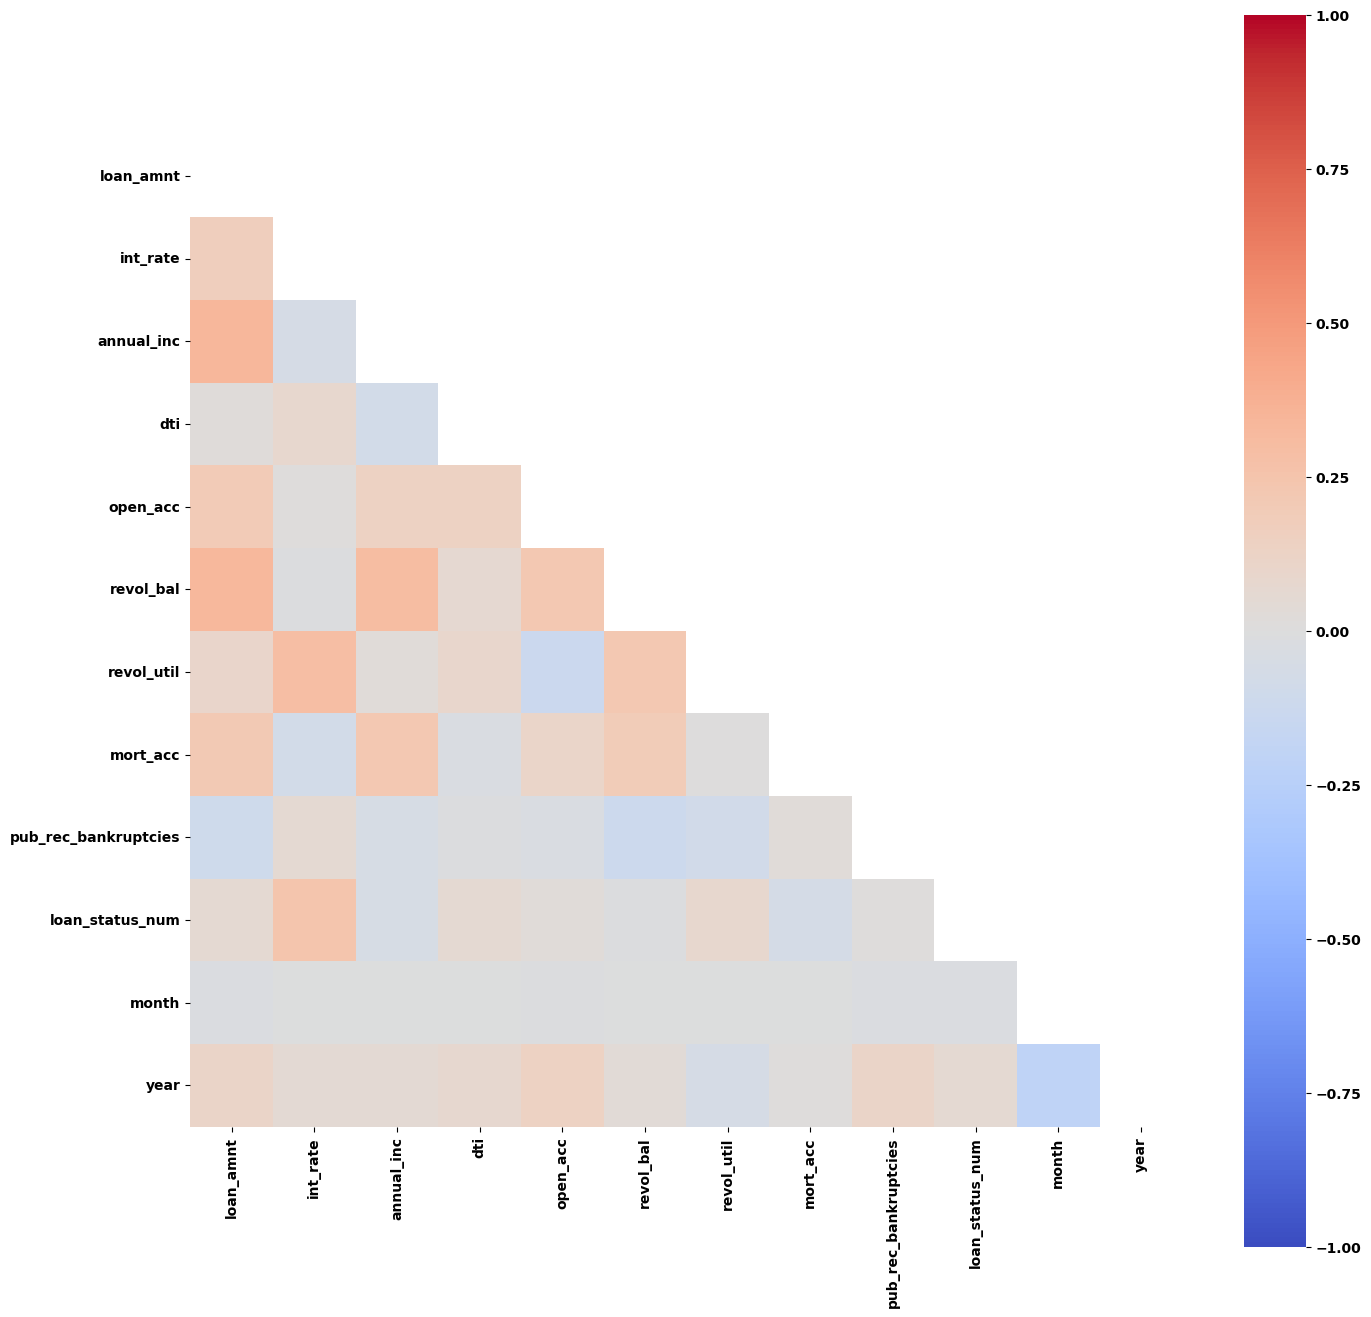

In [40]:
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(raw_df.select_dtypes("number").corr(), dtype=bool))

# Set up the figure with size
plt.figure(figsize=(16, 16))

# Draw the heatmap with the mask, setting vmin and vmax to emphasize the full range of correlations
sns.heatmap(data=raw_df.select_dtypes("number").corr(), cmap="coolwarm", fmt='.2f', square=True, annot=True, mask=mask, vmin=-1.0, vmax=1.0)

plt.show()

We notice that we are left with features that do not have high correlation. So, we do not require to drop any more features.

## Exploratory Data Analysis and Baseline Modeling

###  Numerical Columns

In [41]:
# Create new data frame for numeric columns of raw_df
numeric_df = raw_df.select_dtypes("number")

In [42]:
# Check the numeric columns we shall work with in EDA phase
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   int_rate              395219 non-null  float64
 2   annual_inc            395219 non-null  float64
 3   dti                   395219 non-null  float64
 4   open_acc              395219 non-null  float64
 5   revol_bal             395219 non-null  float64
 6   revol_util            395219 non-null  float64
 7   mort_acc              395219 non-null  float64
 8   pub_rec_bankruptcies  395219 non-null  float64
 9   loan_status_num       395219 non-null  int64  
 10  month                 395219 non-null  int64  
 11  year                  395219 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 39.2 MB


### Univariate Distribution

In this section, we look at the distribution of numeric variables in our dataset. Understanding these distributions is crucial, as they can provide insights into the presence of outliers, the skewness of the data. This understanding helps in preprocessing and modeling decisions.

We could use histograms to visualize the distribution of each numeric feature. 

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'annual_inc'}>],
       [<Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'revol_bal'}>],
       [<Axes: title={'center': 'revol_util'}>,
        <Axes: title={'center': 'mort_acc'}>,
        <Axes: title={'center': 'pub_rec_bankruptcies'}>],
       [<Axes: title={'center': 'loan_status_num'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>]], dtype=object)

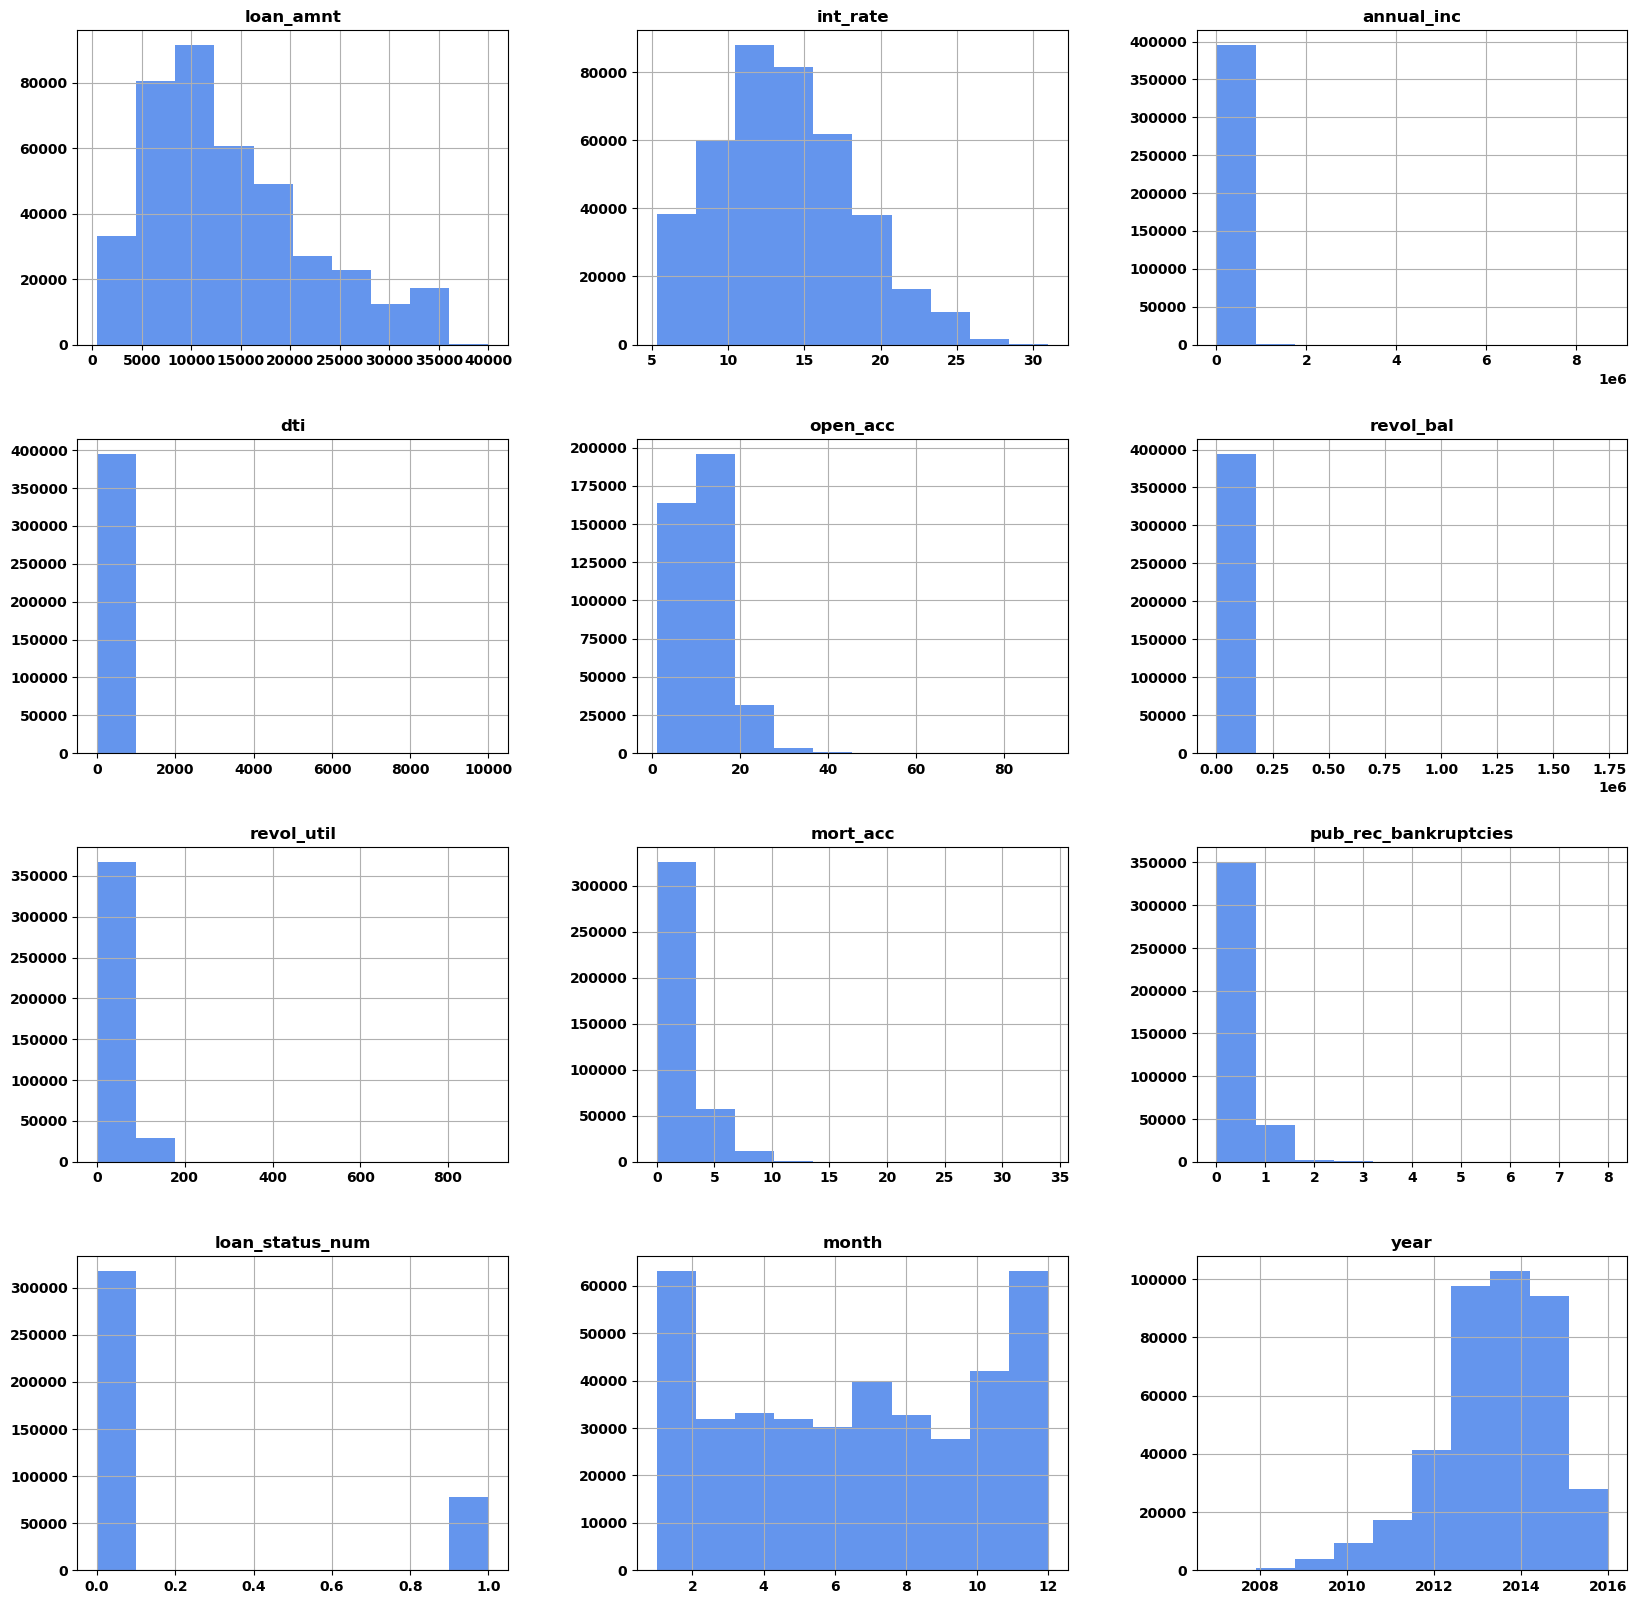

In [43]:
# Generate histogram plots for numeric columns
numeric_df.hist(figsize = (20,20), color ='cornflowerblue')

In the above charts, we notice the following
*  The distribution of `loan_amnt` and `int_rate` resemble normal distribution.
*  Columns `annual_inc`, `dti`, `open_acc`,`pub_rec`,`revol_bal`, `revol_util`, `mort_acc`,`pub_rec_bankruptcies` show heavy right skew. The presence of heavy right skew implies that bulk of the data is concentrated on the lower end of the scale, with a long tail extending towards the higher end. This can affect statistical analyses and model performance, as many statistical methods assume data normality.
*  Columns `loan_status_num`, `month`, and `year` take integer values and their disribution is shown above. However, it more appropriate t look at bar charts for these categorical columns.  

In [44]:
# Select only int32 columns 
int_df = numeric_df.select_dtypes(include='int32')

# Check for data type of int_df
display(type(int_df))

# Plotting bar chart for all columns with int32 datatype
for col in int_df:
    plt.figure(figsize=(4, 3))  # Adjust the figure size as needed
    # For each column, plot a bar chart of value counts
    value_counts = int_df[col].value_counts().sort_index()
    plt.bar(value_counts.index, value_counts.values, color ='cornflowerblue', edgecolor = 'grey' )
    plt.title(f'Bar Chart for {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count of loans issued')
    plt.show()

pandas.core.frame.DataFrame

We can observe that we have extreme values for some of the numeric columns as indicated in the plots for columns showing skewed distribution, we use agg function on the dataframe. 

In [45]:
raw_df.select_dtypes("number").agg(['min', 'max', 'mean','std'])

,loan_amnt,int_rate,annual_inc,dti,open_acc,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,loan_status_num,month,year
min,500.000000,5.320000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,2007.000000
max,40000.000000,30.990000,8.706582e+06,9999.000000,90.000000,1.743266e+06,892.300000,34.000000,8.000000,1.000000,12.000000,2016.000000
mean,14122.061250,13.642094,7.419937e+04,17.390758,11.318494,1.585165e+04,53.808764,1.813792,0.121722,0.196152,6.555563,2013.637507
std,8357.054944,4.472944,6.155725e+04,18.032696,5.134901,2.058427e+04,24.440088,2.044300,0.356273,0.397085,3.425030,1.465752


In [46]:
# Check for extreme values of column dti on the maximum side.
raw_df['dti'].sort_values(ascending=False).head()

285674    9999.00
350865    1622.00
338571     380.53
7011       189.90
36015      145.65
Name: dti, dtype: float64

To identify the highest extreme values in the 'dti' column, the following code arranges the 'dti' values in descending order and displays the top entries.




In [47]:
# Remove the rows with extreme values for dti.
raw_df = raw_df[(raw_df['dti'] != 9999.00) & (raw_df['dti'] != 1622.00)]

In [48]:
raw_df['mort_acc'].sort_values(ascending=False).head()

10208     34.0
323429    32.0
33814     32.0
132453    31.0
226908    31.0
Name: mort_acc, dtype: float64

For columns exhibiting significant right skewness, removing outliers could be a strategy worth considering. The following code is designed to eliminate rows containing such outliers.




In [49]:
# cols = ['annual_inc','dti','open_acc','revol_bal','revol_util','mort_acc','pub_rec_bankruptcies']

# for col in cols:
#     q1 = raw_df[col].quantile(0.25) # calculate the first quartile (Q1, 25th percentile) and the third quartile (Q3, 75th percentile) of the column's data.
#     q3 = raw_df[col].quantile(0.75) 
#     iqr = q3 - q1 # compute the IQR (Q3 - Q1), which measures the middle 50% of the data, providing a measure of the data's spread.

#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr # Define outliers as data points lying beyond 1.5 times the IQR below the first quartile or above the third quartile.

#     raw_df = raw_df[(raw_df[col] >= lower_bound) & (raw_df[col] <= upper_bound)]
#     # data frame is filtered to include only the rows where the column values fall within the calculated lower and upper bounds.

Note: The above plots were generated using Matplotlib. We can also produce these plots using seaborn to produce more aesthetic plots.
Below code demonstrates subplots with seaborn library.

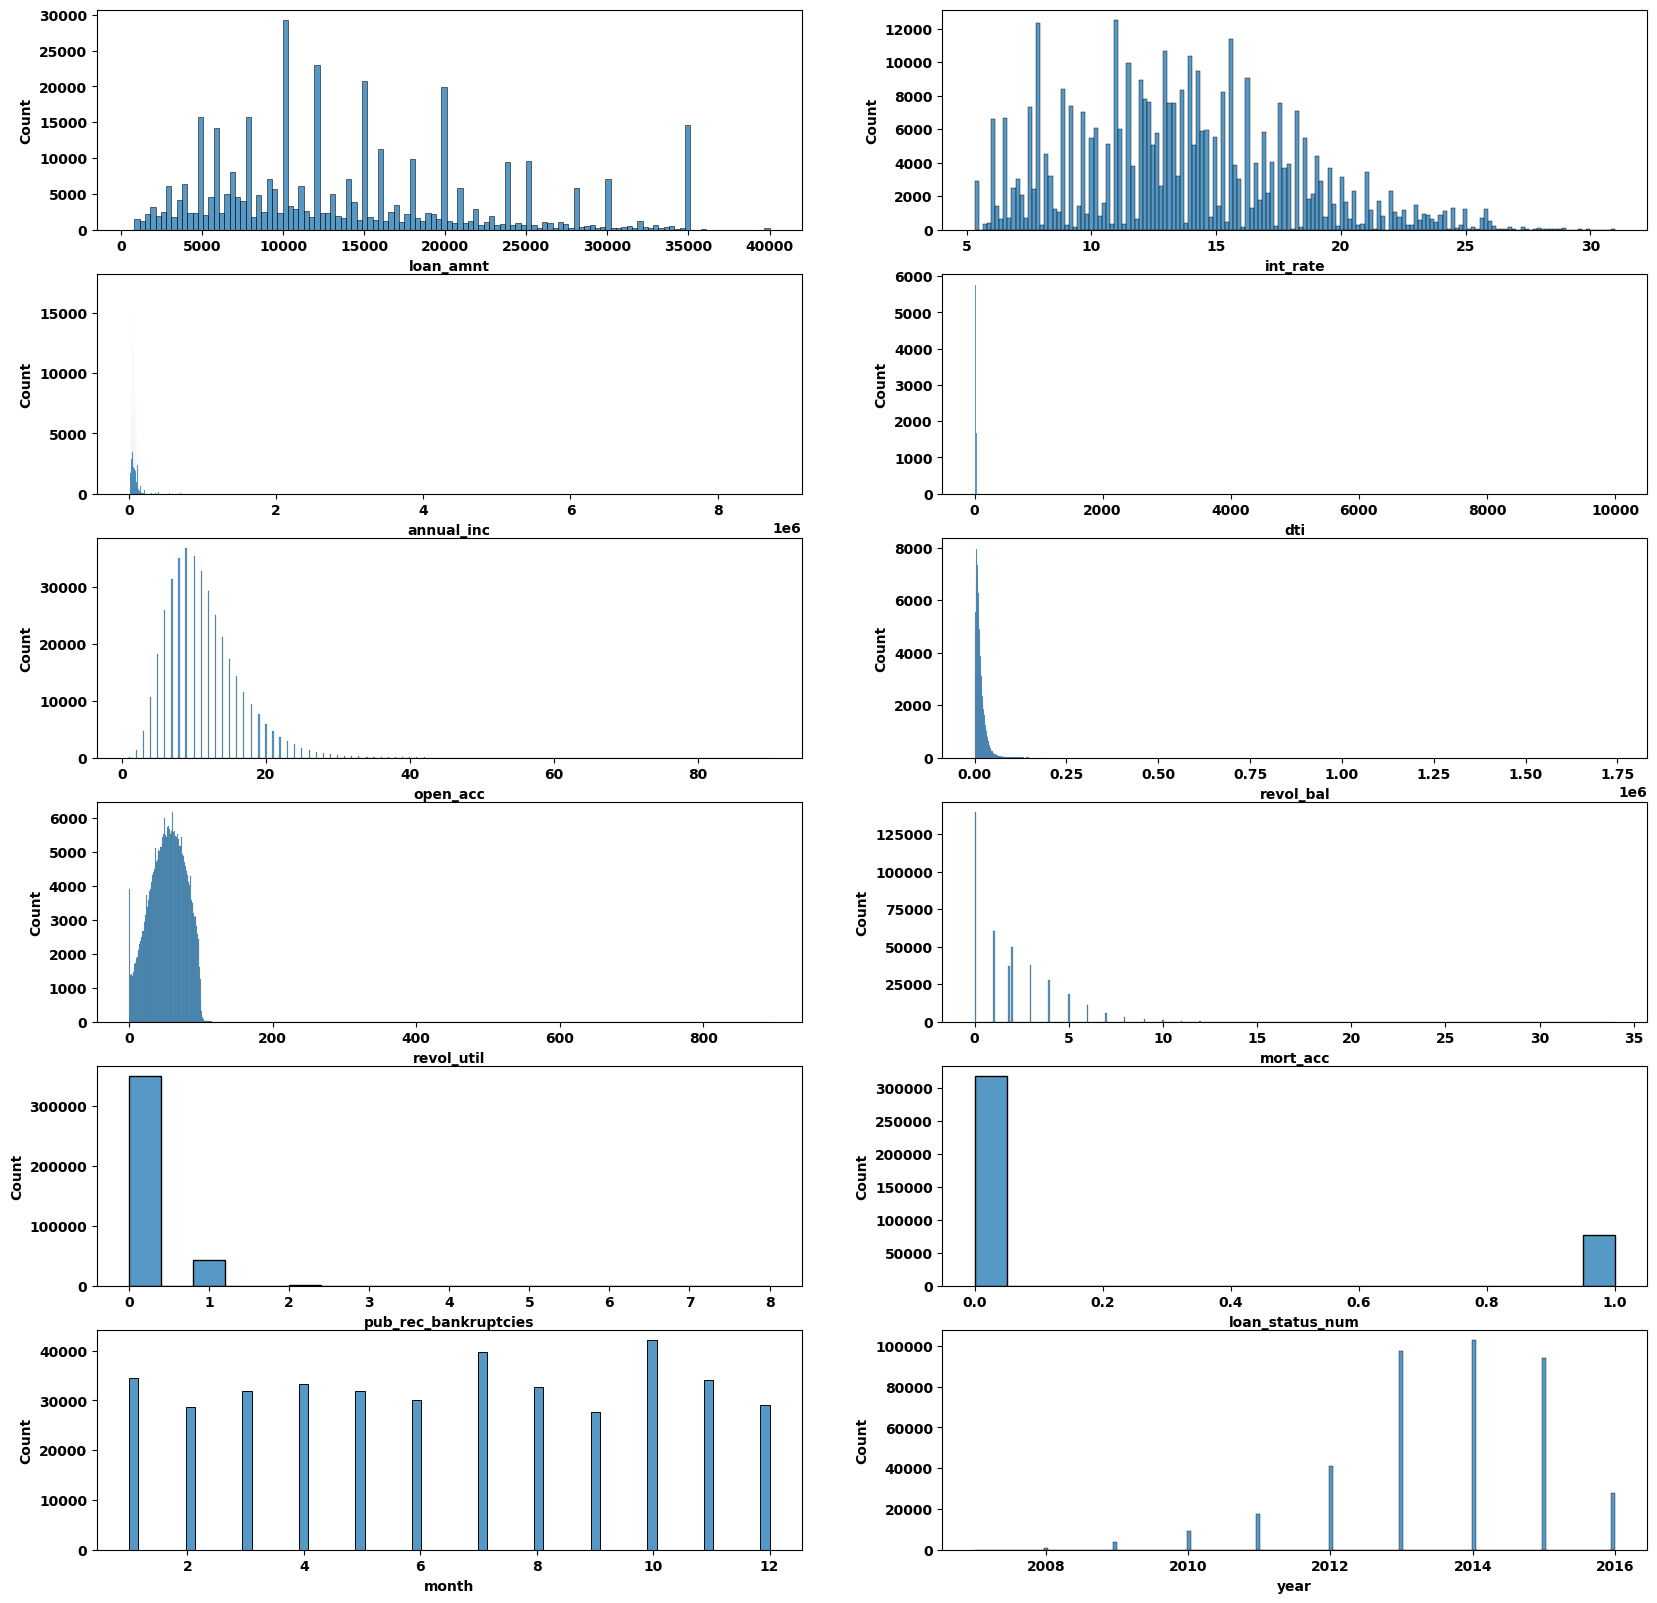

In [50]:
# The goal is to generate a histogram for each numeric feature using Seaborn.

# Initialize a counter to keep track of the subplot number.
plot_num = 1

# Reserve an area for all the subplots and specific the number of plots along each axis
plt.subplots(6,2,figsize=(20,20))

# Iterate through each numeric column
for col in numeric_df.columns:
    plt.subplot(6,2,plot_num) # Create a sub plot with area and sub plot number
    sns.histplot(numeric_df[col]) # Generate a histogram in the sub plot using Seaborn
    #plt.hist(column = numeric_df[col])
    #plt.show()
    plot_num +=1 

#plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'annual_inc'}>],
       [<Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'revol_bal'}>],
       [<Axes: title={'center': 'revol_util'}>,
        <Axes: title={'center': 'mort_acc'}>,
        <Axes: title={'center': 'pub_rec_bankruptcies'}>],
       [<Axes: title={'center': 'loan_status_num'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>]], dtype=object)

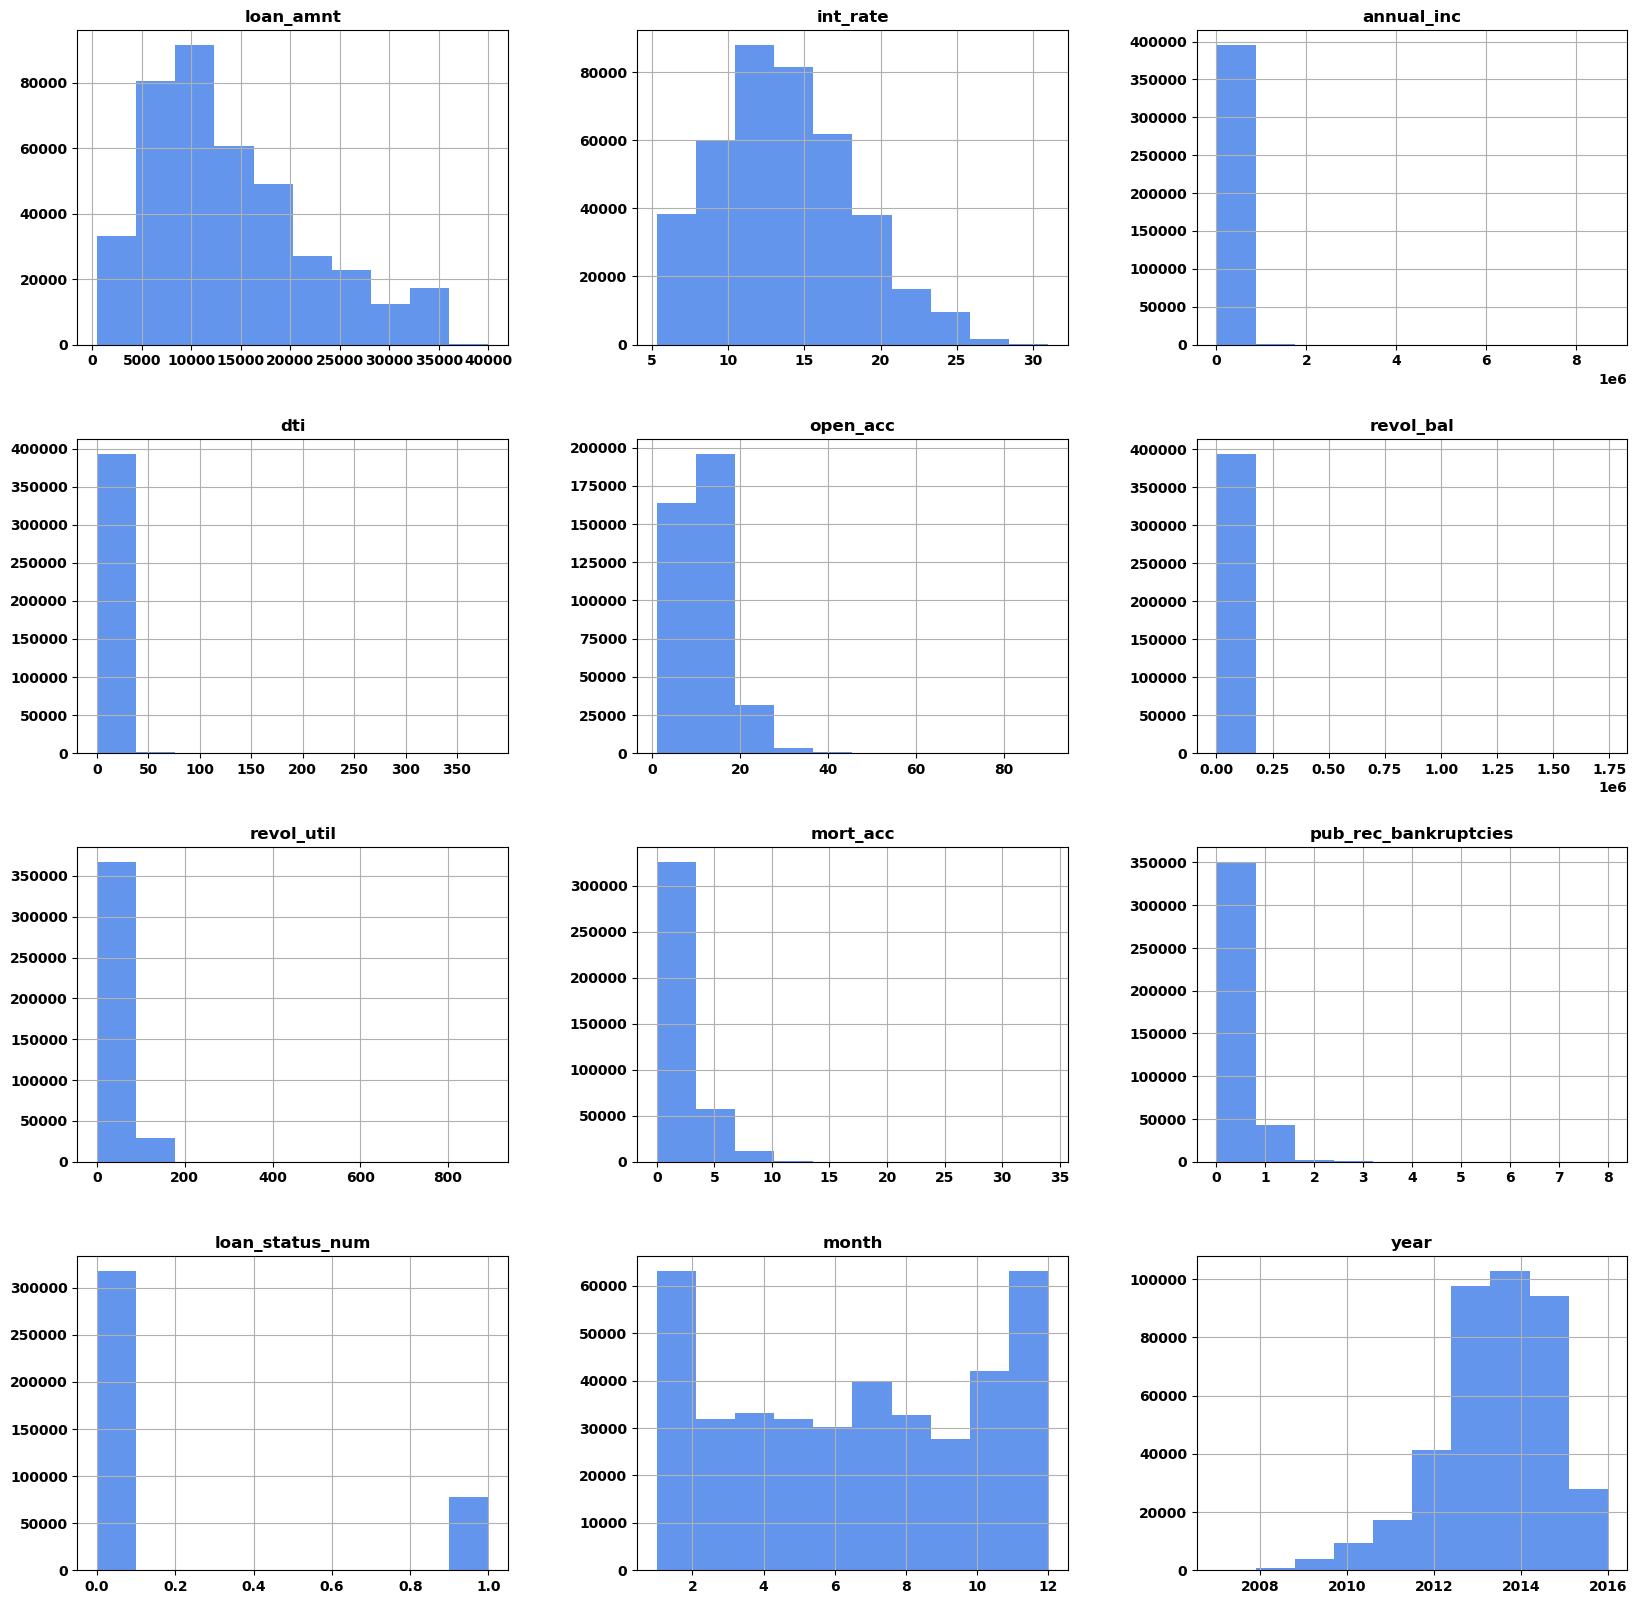

In [51]:
# Generate histogram plots for numeric columns
raw_df.hist(figsize = (20,20), color ='cornflowerblue')

For the numeric columns that exhibit heavy right skew, we could perform log transformation to transform their distribution into a more normalised form.
These plots provide better visuals.

### Log Transformation ###

The code for applying log transformation is as under

In [52]:
small_const = 1e-10 # We define a small constant to avoid taking log of zero.

raw_df['annual_inc'] = np.log(raw_df['annual_inc']+ small_const)
raw_df['dti'] = np.log(raw_df['dti']+ small_const)
raw_df['revol_bal'] = np.log(raw_df['revol_bal']+ small_const)
raw_df['revol_util'] = np.log(raw_df['revol_util']+ small_const)
raw_df['mort_acc'] = np.log(raw_df['mort_acc']+ small_const)
raw_df['pub_rec_bankruptcies'] = np.log(raw_df['pub_rec_bankruptcies']+ small_const)

We assigned the transformed column to the same raw_df data frame. Notice that we did not use numeric_df for log transformation.
Let us generate the histograms for each numeric feature of raw_df to check if they exhibit a more normalized distribution.

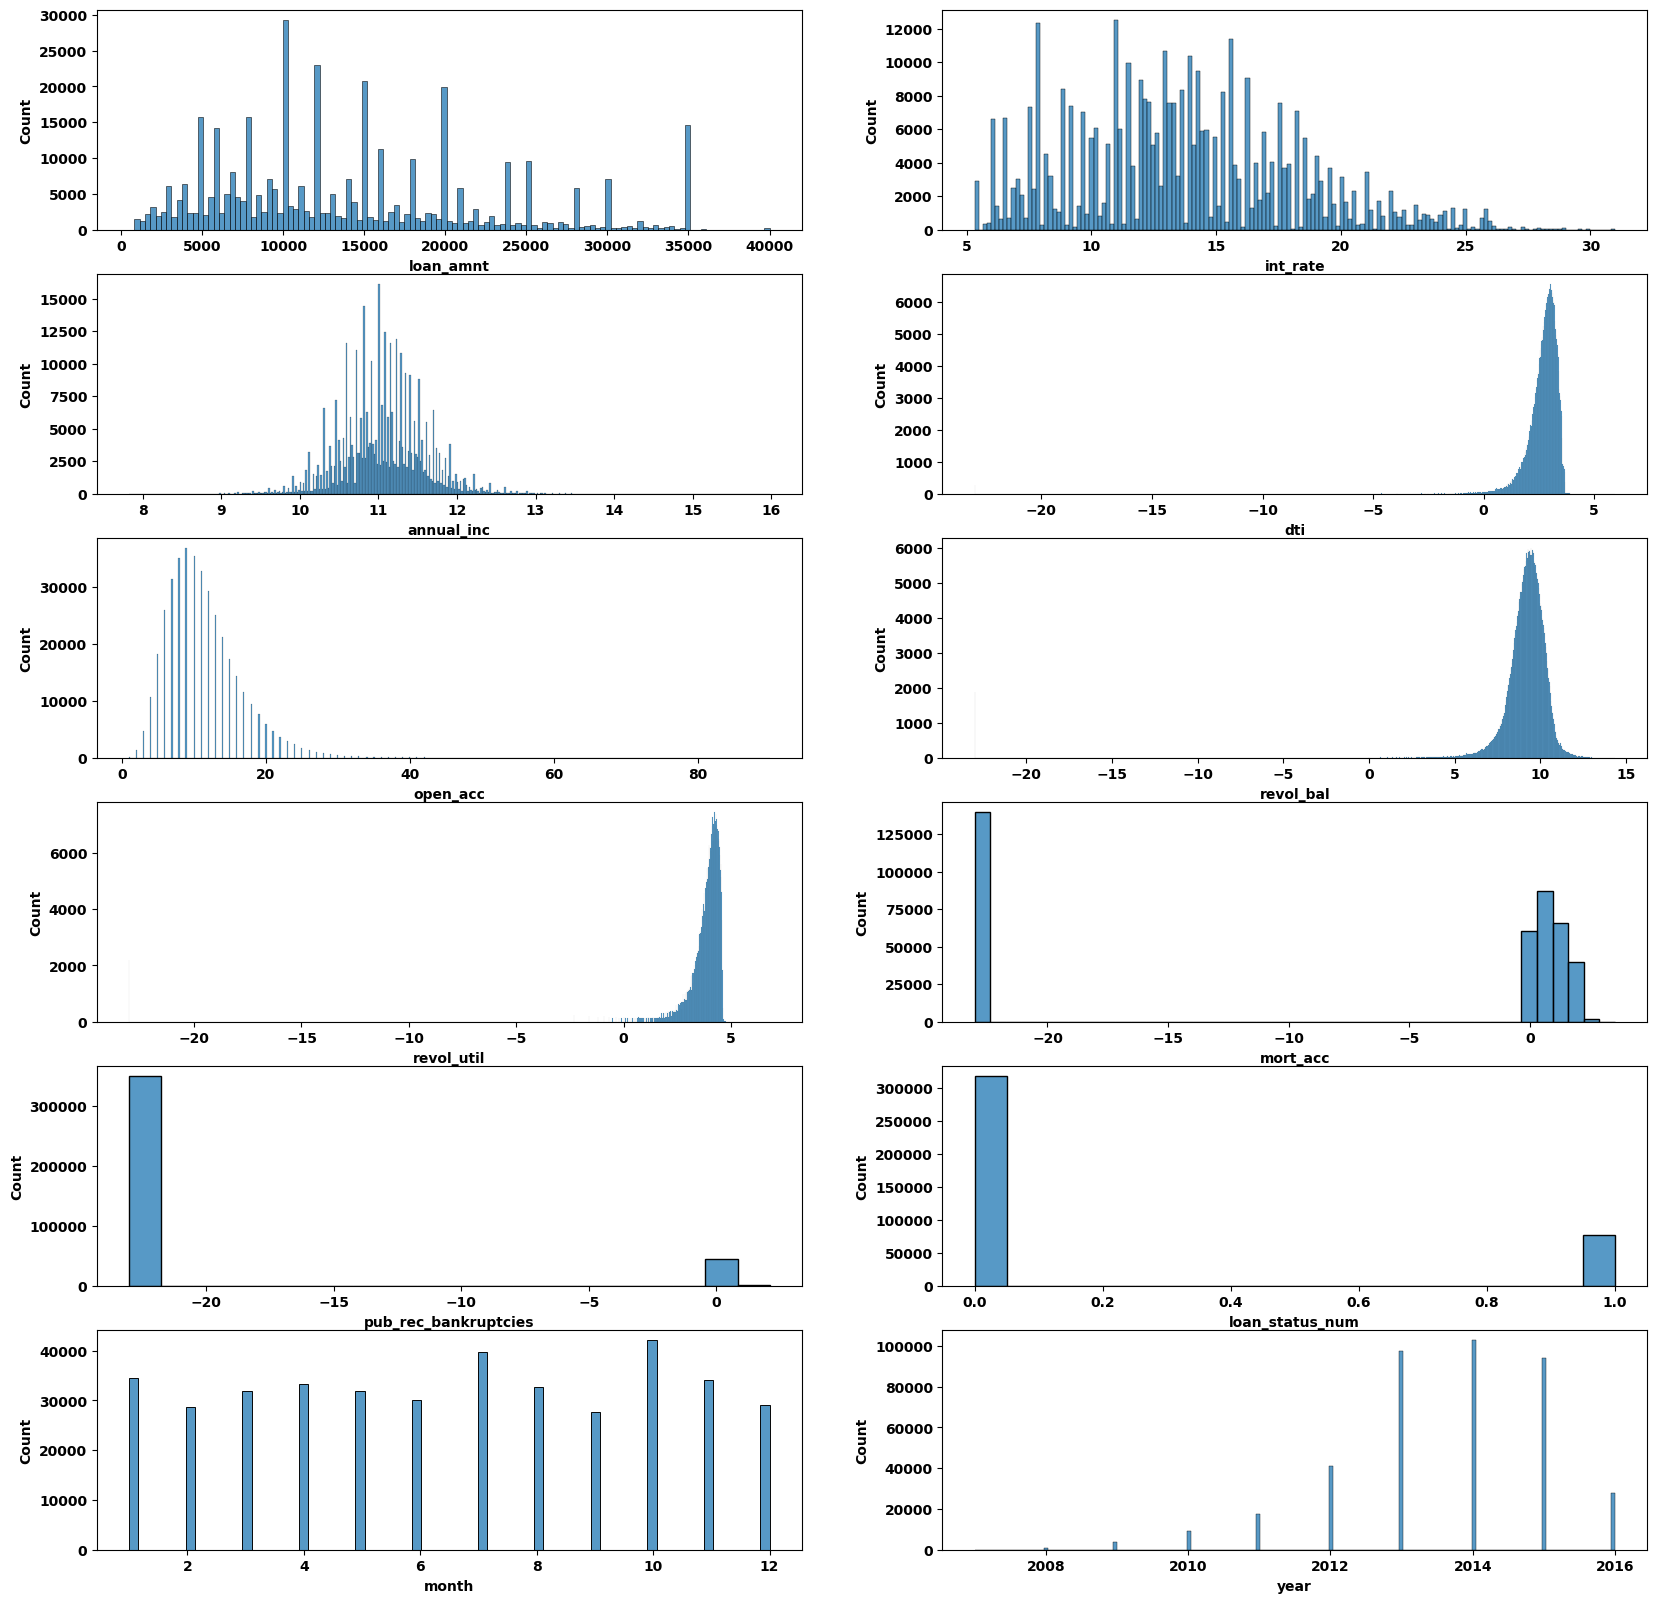

In [53]:
# The goal is to generate a histogram for each numeric feature using Seaborn.

# Initialize a counter to keep track of the subplot number.
plot_num = 1

# Reserve an area for all the subplots and specific the number of plots along each axis
plt.subplots(6,2,figsize=(20,20))

# Iterate through each numeric column
for col in raw_df.select_dtypes("number").columns:
    plt.subplot(6,2,plot_num) # Create a sub plot with area and sub plot number
    sns.histplot(raw_df[col]) # Generate a histogram in the sub plot using Seaborn
    #plt.hist(column = numeric_df[col])
    #plt.show()
    plot_num +=1 

#plt.tight_layout()
plt.show()

In the above plots, after log transformation, we observe that distribution of columns exhibit more a normalised curve.

In [54]:
# plt.figure(figsize=(40, 80))

# # Create pairplot
# sns.pairplot(numeric_df)
# plt.tight_layout()
# plt.show()

Most of the plots show a non-linear relationship or no relationship. It suggests that linear models may not be suitable for modeling these relationships. It may be necessary to explore non-linear modeling techniques or consider alternative features that could capture the underlying patterns more effectively. 

In [55]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395217 entries, 0 to 396029
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395217 non-null  float64
 1   term                  395217 non-null  object 
 2   int_rate              395217 non-null  float64
 3   grade                 395217 non-null  object 
 4   home_ownership        395217 non-null  object 
 5   annual_inc            395217 non-null  float64
 6   loan_status           395217 non-null  object 
 7   purpose               395217 non-null  object 
 8   dti                   395217 non-null  float64
 9   open_acc              395217 non-null  float64
 10  revol_bal             395217 non-null  float64
 11  revol_util            395217 non-null  float64
 12  initial_list_status   395217 non-null  object 
 13  application_type      395217 non-null  object 
 14  mort_acc              395217 non-null  float64
 15  

### Box Plots of Numerical Features grouped by Loan Status

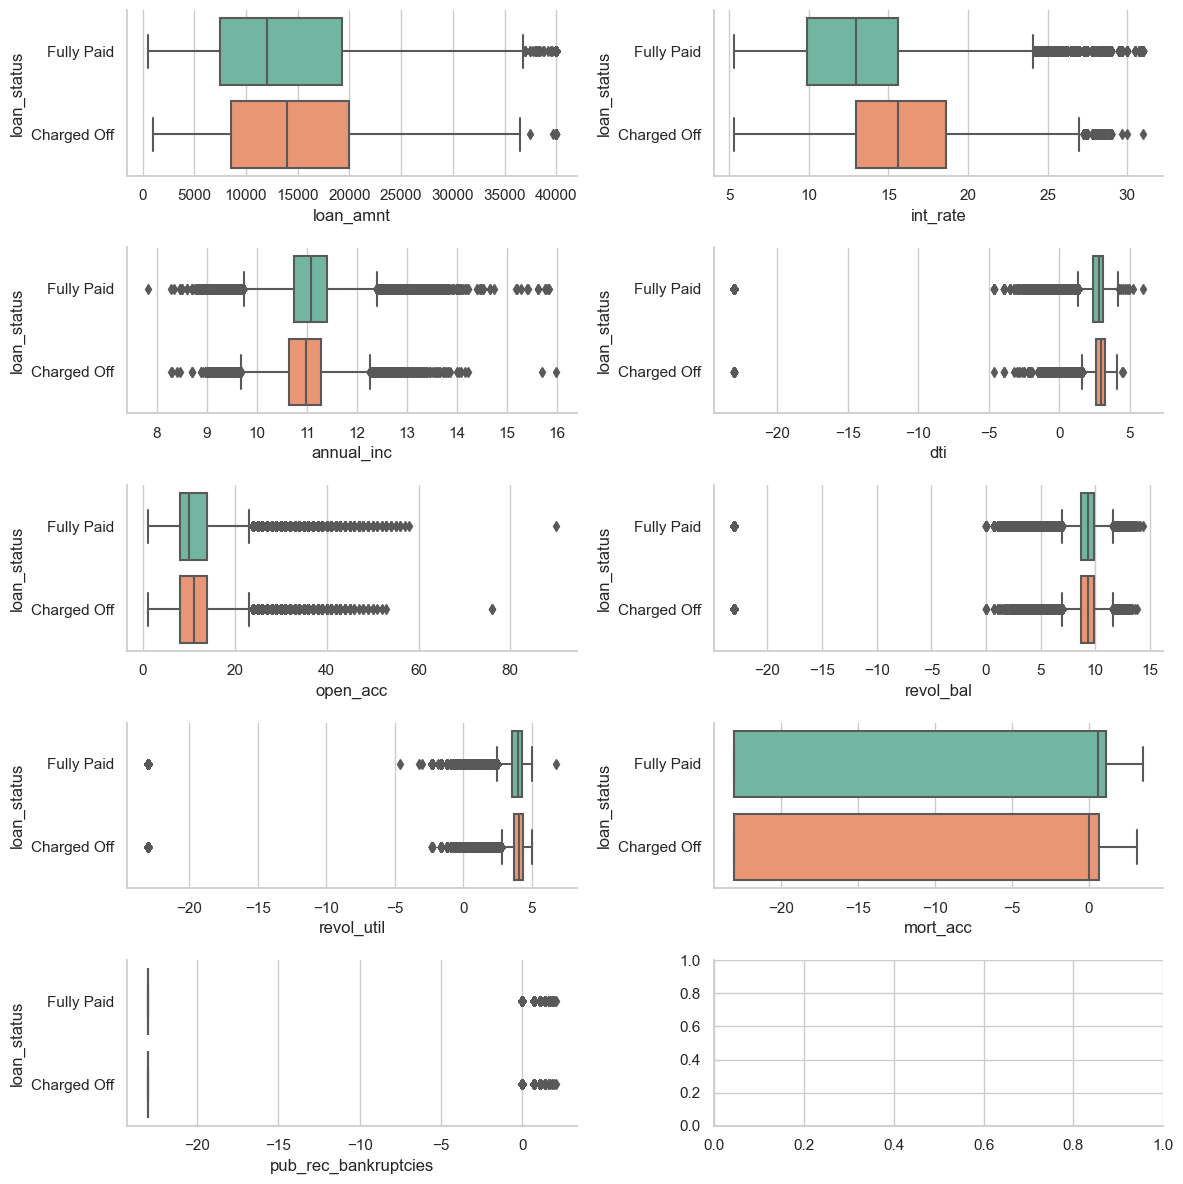

In [56]:
# Use a built-in Seaborn color palette
palette = "Set2"  

# Set the aesthetics for the plots
sns.set(style="whitegrid")

plot_num = 1

plt.subplots(5, 2, figsize=(12, 12))

# Create a box plot for each numerical column in the DataFrame
for column in numeric_df.select_dtypes("float64").columns:
    plt.subplot(5, 2, plot_num)
    sns.boxplot(data=raw_df, x=column, y="loan_status", palette=palette)
    sns.despine()
    plot_num += 1

plt.tight_layout()
plt.show()


* `loan_amount`,`open_acc`, `annual_inc`,`pub_rec`,`recol_bal`,`revol_util`,`mort_acc`,`month`,`year` seem to have little effect on `loan_status` variable and are not a strong differentiator in predicting loan status.
* `loan_status` of 'Charged_off' has higher interest rate range than 'Fully Paid', ranging from 12% to 18%
* `loan_amnt` range is slightly lower for 'Fully repaid' over 'Charged Off'
* `annual_inc` is slightly higher for 'fully repaid'.
* In the above plots, major difference between Fully Paid an Charged off is seen only interest rates

**Loan Status by Categorical Feature Analysis**

We can analyze the target variable against a grouping of categorical variables. 

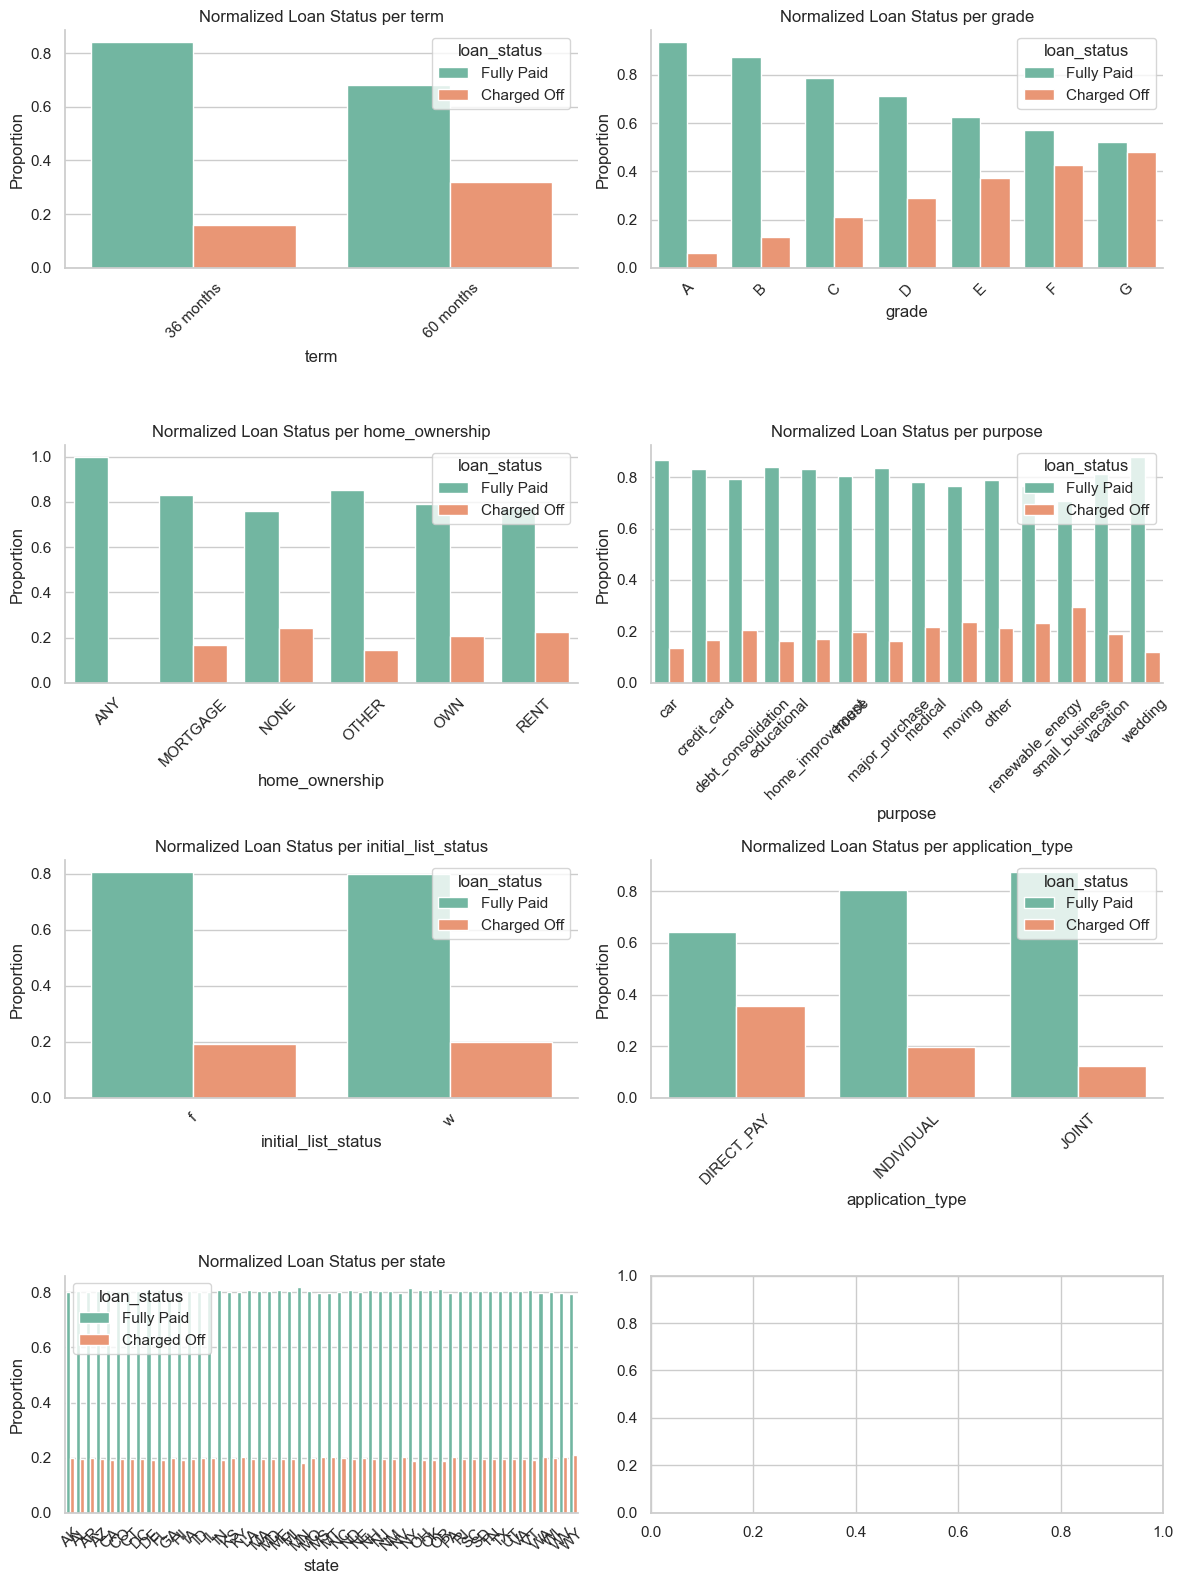

In [57]:

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Initialize the figure with specified rows and columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()  # Flatten to easily iterate over

# Extract the first two colors from Seaborn's "Set2" palette for "Fully Paid" and "Charged Off"
set2_colors = sns.color_palette("Set2")
color_mapping = {"Fully Paid": set2_colors[0], "Charged Off": set2_colors[1]}

plot_num = 0  # Start with the first subplot index

# Iterate over each object-type column to create a normalized count plot, excluding 'loan_status'
for column in raw_df.select_dtypes(include=["object"]).columns:
    if column != "loan_status":
        # Calculate the normalized counts
        normalized_counts = raw_df.groupby(column)['loan_status'].value_counts(normalize=True).rename('proportion').reset_index()

        # Plotting
        sns.barplot(data=normalized_counts, x=column, y='proportion', hue='loan_status', palette=color_mapping, ax=axes[plot_num])
        axes[plot_num].set_title(f"Normalized Loan Status per {column}")
        axes[plot_num].tick_params(axis='x', rotation=45)
        axes[plot_num].set_ylabel("Proportion")
        sns.despine(ax=axes[plot_num])

        plot_num += 1  # Move to the next subplot
        if plot_num >= len(axes):  # Check if we've filled the grid
            break

# Adjust layout and display the figure
plt.tight_layout()

**Analysis of Distributions for Numeric Features Excluding Outliers**

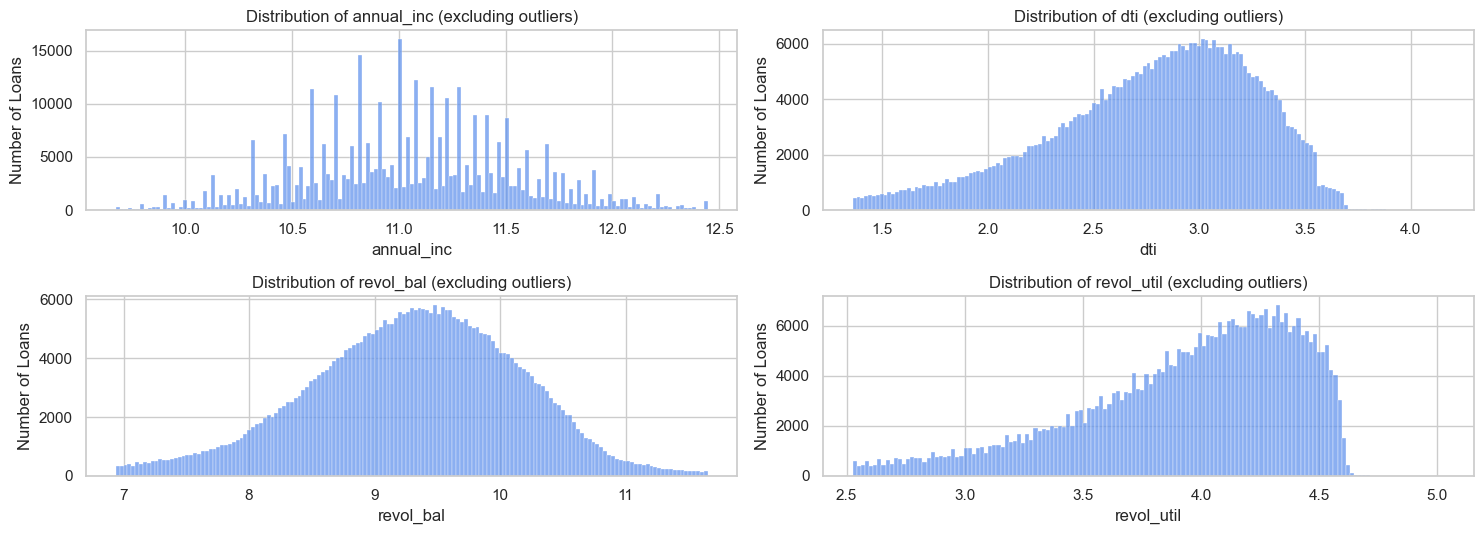

In [58]:
cols_with_outliers = ['annual_inc', 'dti', 'revol_bal', 'revol_util']

plt.subplots(2,2, figsize=(15,5.5))
plot_num = 1

for col in cols_with_outliers:
    q1 = raw_df[col].quantile(0.25)
    q3 = raw_df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_data = raw_df[(raw_df[col] >= lower_bound) & (raw_df[col] <= upper_bound)]

    plt.subplot(2, 2, plot_num)  # Adjust the subplot grid as needed
    
    sns.histplot(filtered_data[col], color='cornflowerblue')
    plt.title(f"Distribution of {col} (excluding outliers)")
    plt.xlabel(col)
    plt.ylabel("Number of Loans")

    plot_num += 1

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Analysis of Normalized Categorical Feature Distributions**

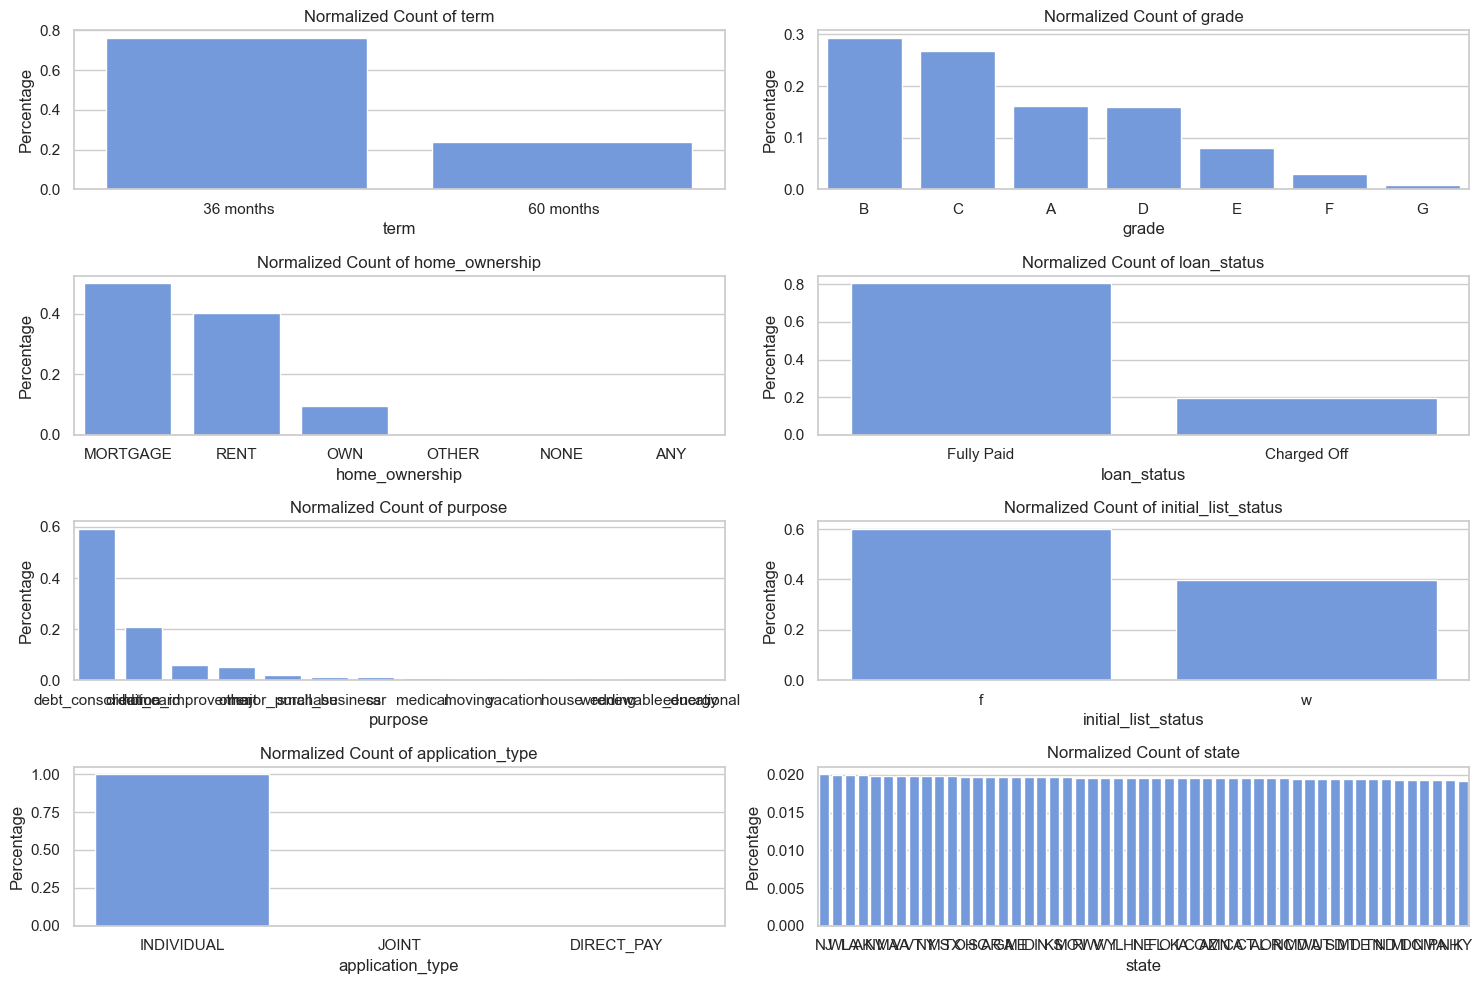

In [59]:
categorical_df = raw_df.select_dtypes("object")

plot_num = 1

plt.subplots(4, 2, figsize=(15, 10))

#for col in categorical_df.columns:
for col in categorical_df.columns:
   
    plt.subplot(4, 2, plot_num)
    
    # Calculate normalized counts manually
    counts = raw_df[col].value_counts(normalize=True)
    
    # Plot the bar chart with a single color (e.g., 'cornflowerblue')
    sns.barplot(x=counts.index, y=counts.values, color='cornflowerblue')
    
    plt.title(f"Normalized Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plot_num += 1

plt.tight_layout()
plt.show()

* 75% of loans have 3 years tenor and remaining have 5 year tenor.
* Grades B and C have the highest loans, followed by A and D.
* Most of the loans have have home ownership listed as mortgage, followed by rent.
* 80% of loans are under 'Fully paid' category and remaining 20% are under 'Charged Off' category.
* Two many categories in purpose.
* Most of the applications have individual category.

1. Maximum loans are in the range of 5k to 12.5k USD.
2. Minimum loans are extended in range of 27k to 32k USD.


Most loans are in the range of 11% to 16%. The loans above 21% taper off.

**Analysis of Loan Term Rates by Loan Grade**

<Figure size 200x200 with 0 Axes>

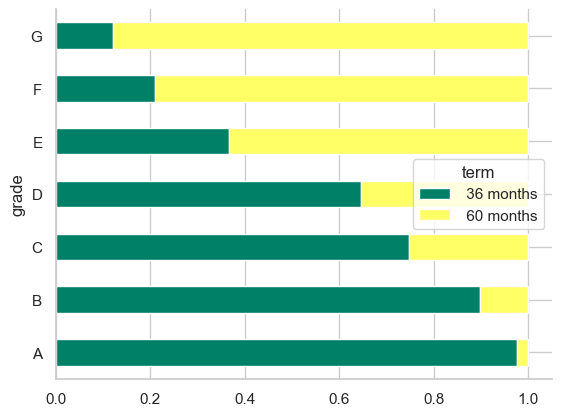

In [60]:
plt.figure(figsize = (2,2))

rates = raw_df.groupby(["grade", "term"])["term"].count()/raw_df.groupby(["grade"])["term"].count()
rates.unstack().plot(kind="barh", stacked=True, colormap="summer")
sns.despine()
plt.show()

* In terms of grade of loan, we notice that the distribution of better grade loans are of shorter tenor of 36 months and vice versa 

**Correlation Heatmap of Numeric Features**

Let us check for correlation between features afer the log transformations

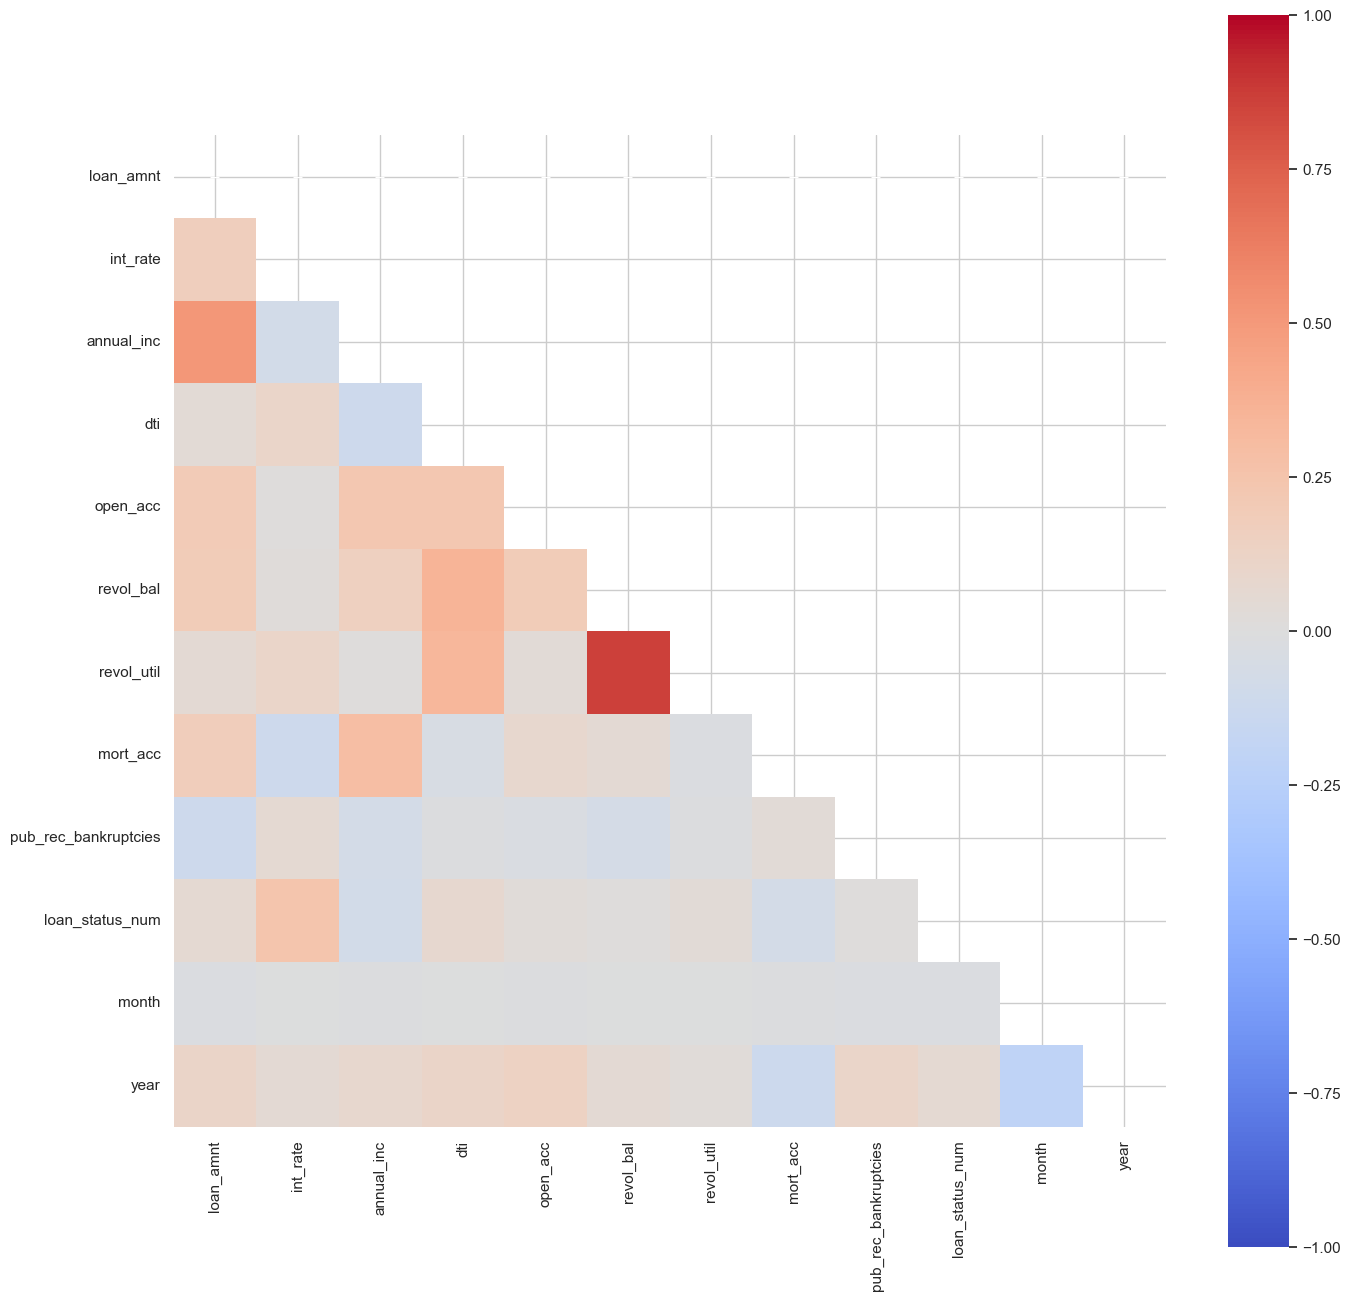

In [61]:
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(raw_df.select_dtypes("number").corr(), dtype=bool))

# Set up the figure with size
plt.figure(figsize=(16, 16))

# Draw the heatmap with the mask
sns.heatmap(data = raw_df.select_dtypes("number").corr(), cmap="coolwarm",fmt='.2f',square=True, annot=True, mask=mask, vmin = -1.0, vmax = +1.0)

plt.show()


* `revol_bal` and `revol_util` show high correlation. We may consider dropping one of the columns. 


In [62]:
raw_df = raw_df.drop(columns = ['revol_bal'])

**Exclusion of target variable 'loan_status' Column from Dataframes**

In [63]:
raw_df = raw_df.drop(columns = ['loan_status'])
categorical_df = categorical_df.drop(columns = ['loan_status'])

* We have removed the 'loan_status' column from the raw dataframe.
* Similarly, the 'loan_status' column has been excluded from the categorical dataframe.
* This step is taken to separate the target variable from the predictor variables for further analysis and modeling.
* The 'loan_status' column is typically the target variable we aim to predict, and it is removed to prevent data leakage during modeling.
* The dataframes are now ready for feature selection, preprocessing, and modeling without the 'loan_status' column.

In [64]:
# Removing the 'purpose' and 'state' column from the raw_df dataframe

raw_df = raw_df.drop(columns = ['purpose'])
raw_df = raw_df.drop(columns = ['state'])

Based on the EDA, these columns have been removed. Purpose has too many categories and state has not predictive power

In [65]:
# Removing the 'purpose' and 'state' column from the categorical_df dataframe
categorical_df = categorical_df.drop(columns = ['purpose'])

In [66]:
categorical_df = categorical_df.drop(columns = ['state'])

* In this section, we perform feature engineering and one-hot encoding of categorical variables to prepare the data for modeling. 

**One-Hot Encoding of Categorical Variables**

In [67]:
dummies_df = pd.get_dummies(categorical_df, drop_first=True)

# Now, concatenate the numerical columns with the original dataframe

processed_df = pd.concat([raw_df, dummies_df], axis=1)

# Drop the original categorical columns if needed
processed_df = processed_df.drop(categorical_df.columns, axis=1)

# Now, processed_df contains the original numerical columns and the one-hot encoded categorical columns

In [68]:
# write csv to the current directory
processed_df.to_csv("cleanfile.csv", index=False)

* First, we create a new DataFrame called 'dummies_df' by one-hot encoding the categorical variables from 'categorical_df'. 
* 'drop_first=True' parameter is used to drop the first category for each variable to avoid multicollinearity.
* Next, we concatenate the one-hot encoded categorical columns with the original numerical columns from 'raw_df' to create the 'processed_df' DataFrame.
* We drop the original categorical columns from 'processed_df' to eliminate redundancy, ensuring that only the one-hot encoded columns remain.

In [69]:
# Check the columns after encoding in processed_df
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395217 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    395217 non-null  float64
 1   int_rate                     395217 non-null  float64
 2   annual_inc                   395217 non-null  float64
 3   dti                          395217 non-null  float64
 4   open_acc                     395217 non-null  float64
 5   revol_util                   395217 non-null  float64
 6   mort_acc                     395217 non-null  float64
 7   pub_rec_bankruptcies         395217 non-null  float64
 8   loan_status_num              395217 non-null  int64  
 9   month                        395217 non-null  int64  
 10  year                         395217 non-null  int64  
 11  term_ 60 months              395217 non-null  uint8  
 12  grade_B                      395217 non-null  uint8  
 13 

In [70]:
processed_df.shape

(395217, 26)

**Heatmap for all columns of processed_df**

We could check for correlations after pre-processing through one-hot encoding.

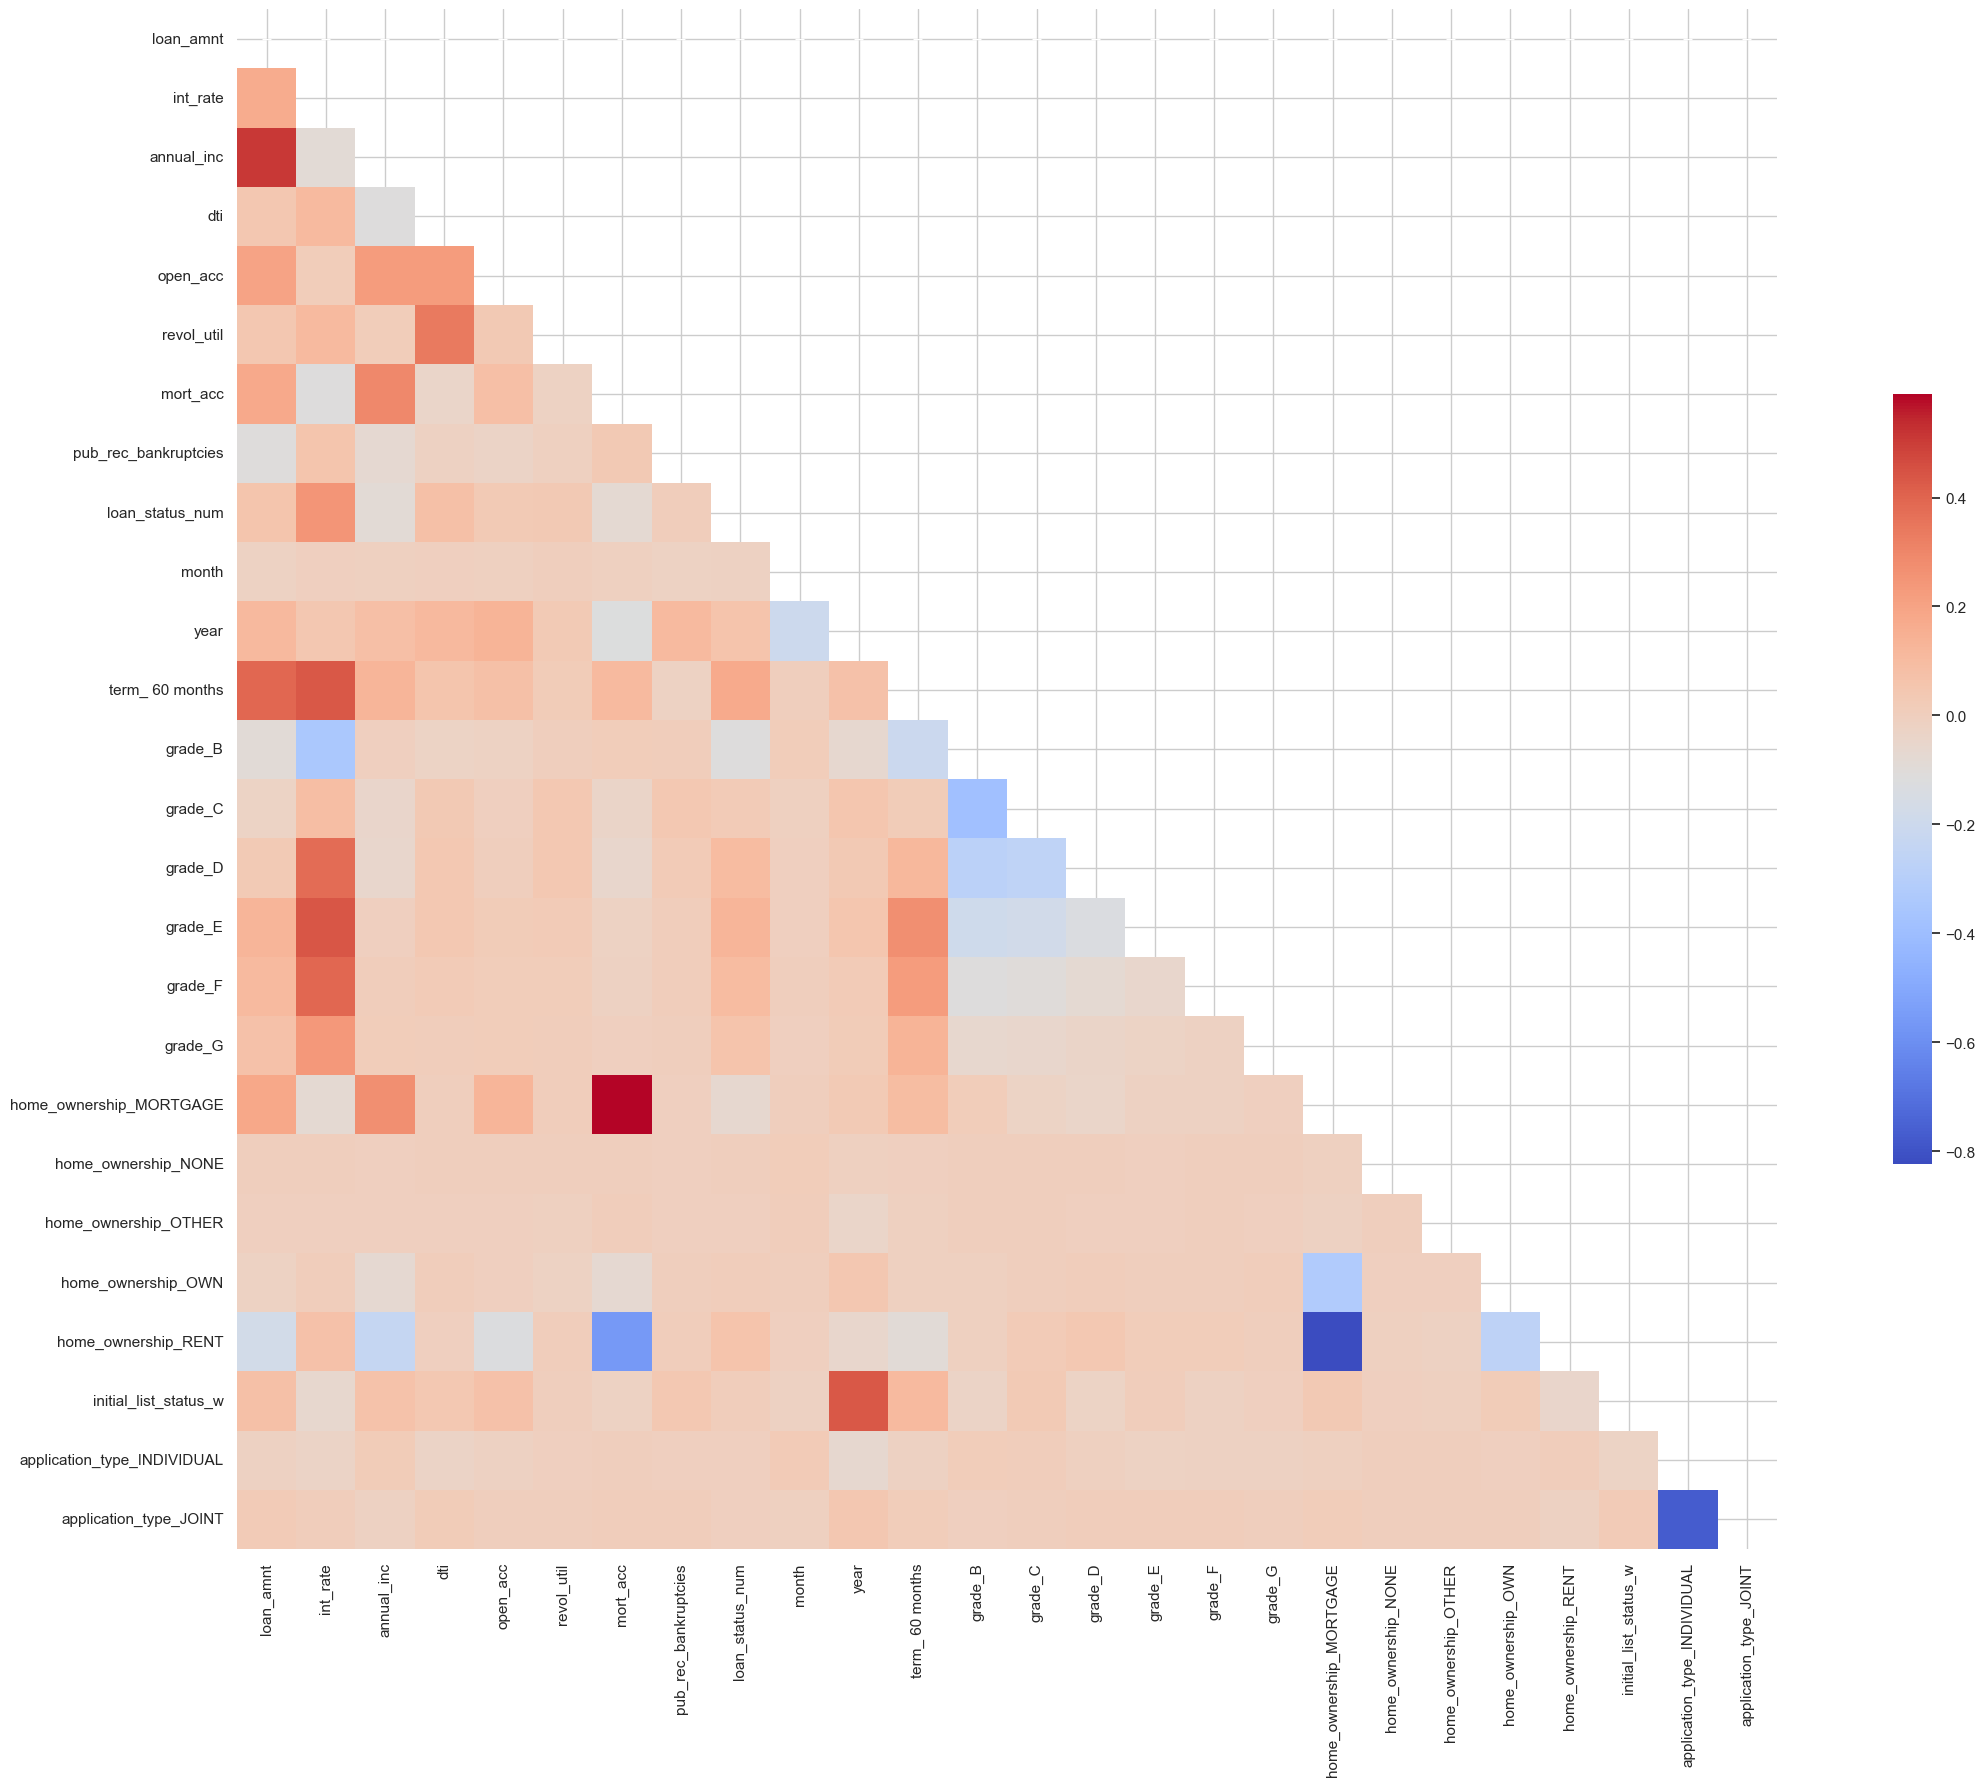

In [71]:
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(processed_df.corr(), dtype=bool))

# Set up the figure with size
plt.figure(figsize=(30, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data=processed_df.corr(), mask=mask, cmap="coolwarm", annot=True, square=True, fmt='.1f', cbar_kws={"shrink": .5})

plt.show()


We observe that two columns 'home_ownership_RENT' and 'home_ownership_Mortgage' show high correlation. 

We also see that 'application_type_JOINT','application_type_Individiual' show high correlation. We shall drop one column each from these two pairs.

In [72]:
# Drop high correlation features as required
processed_df = processed_df.drop(columns =['home_ownership_RENT','application_type_JOINT'])

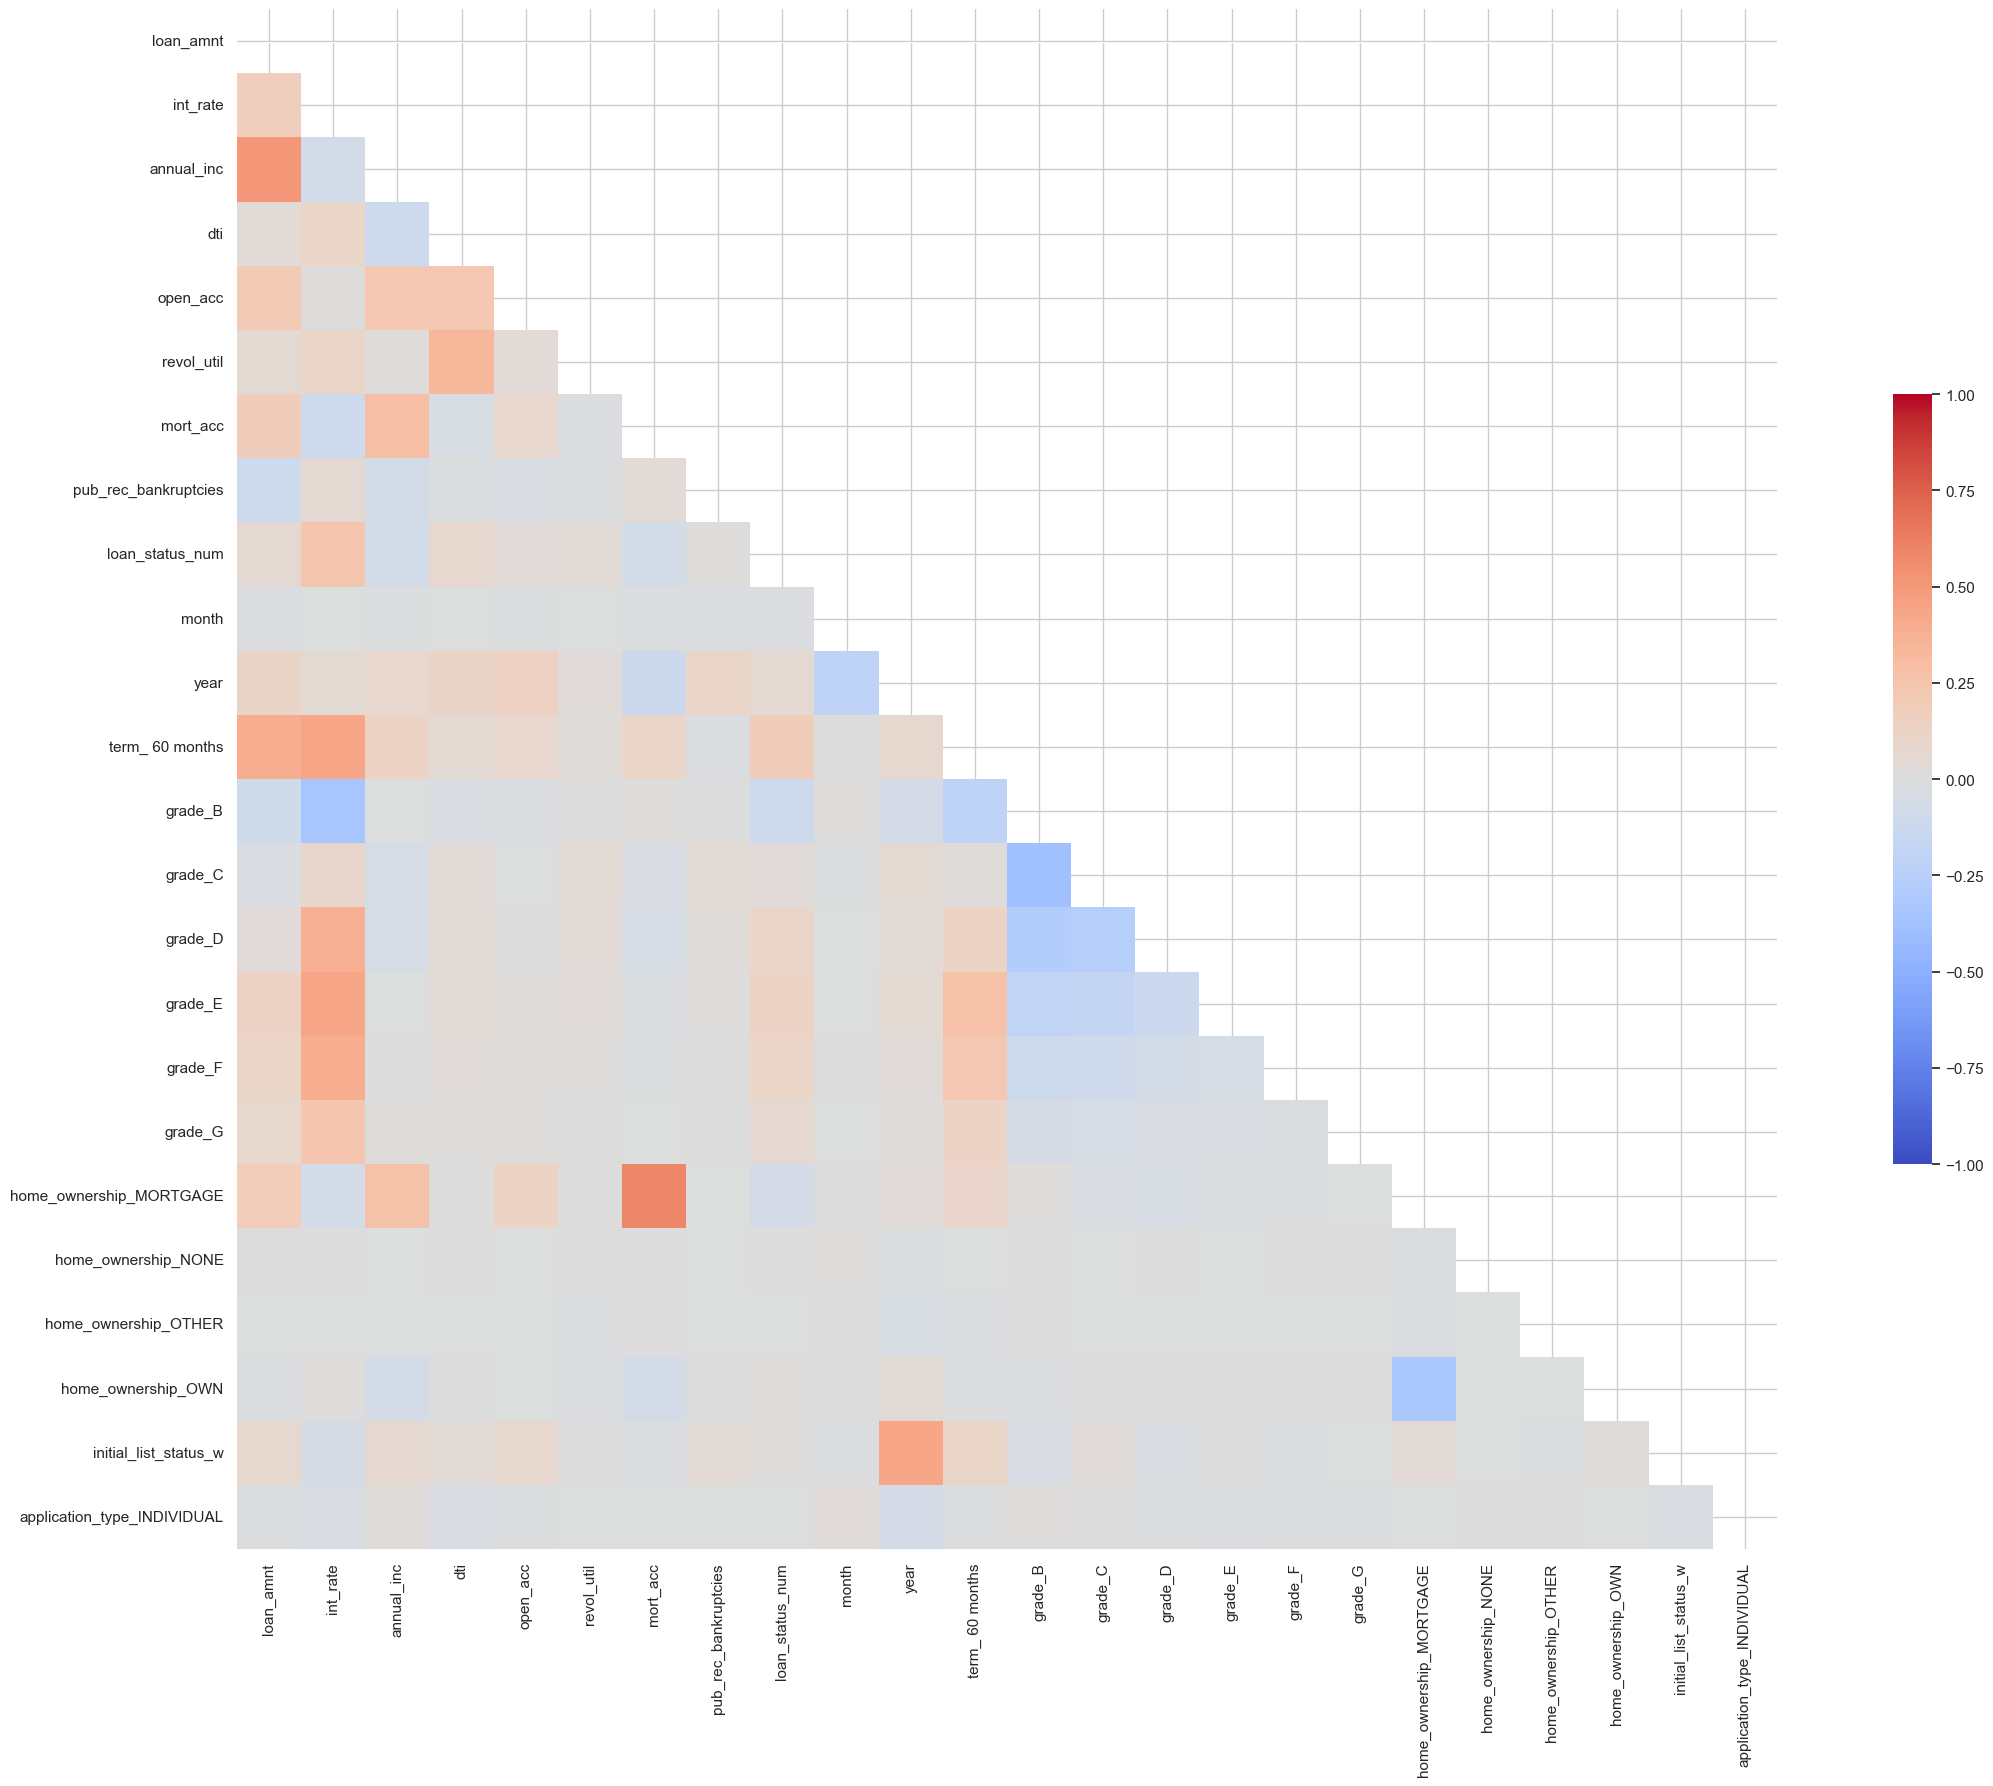

In [73]:
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(processed_df.corr(), dtype=bool))

# Set up the figure with size
plt.figure(figsize=(30, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data=processed_df.corr(), mask=mask, cmap="coolwarm", annot=True, square=True, fmt='.1f', cbar_kws={"shrink": .5}, vmin = -1.0, vmax = 1.0)

plt.show()


## Train-Test Split

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features (X) and target variable (y)
X = processed_df.drop('loan_status_num', axis=1)  #  'loan_status' is target variable
y = processed_df['loan_status_num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform all columns in training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform all columns in testing set
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [75]:
X_test_scaled.head()

,loan_amnt,int_rate,annual_inc,dti,open_acc,revol_util,mort_acc,pub_rec_bankruptcies,month,year,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,initial_list_status_w,application_type_INDIVIDUAL
0,1.901110,0.878388,1.149590,0.334656,0.327446,0.329077,0.665663,-0.359407,-1.038587,0.247457,1.789945,-0.643951,-0.60398,2.289094,-0.294145,-0.175350,-0.087613,0.996956,-0.008798,-0.016551,-0.323906,-0.814222,0.042826
1,-0.917556,2.333415,-1.100011,-1.166702,-0.840844,0.155583,0.665663,-0.359407,-1.330600,0.247457,-0.558676,-0.643951,-0.60398,-0.436854,-0.294145,5.702894,-0.087613,0.996956,-0.008798,-0.016551,-0.323906,-0.814222,0.042826
2,0.225470,-0.471592,-0.125041,0.775210,0.716876,0.187962,0.665663,-0.359407,0.129467,0.929755,1.789945,1.552912,-0.60398,-0.436854,-0.294145,-0.175350,-0.087613,0.996956,-0.008798,-0.016551,-0.323906,1.228166,0.042826
3,0.207517,-0.558760,-0.465974,0.364554,0.327446,0.392969,0.761890,-0.359407,-1.038587,-0.434841,-0.558676,1.552912,-0.60398,-0.436854,-0.294145,-0.175350,-0.087613,0.996956,-0.008798,-0.016551,-0.323906,-0.814222,0.042826
4,-0.223362,-0.257026,-1.579674,0.309902,0.716876,0.012055,-1.351158,2.776564,-0.454560,0.247457,-0.558676,1.552912,-0.60398,-0.436854,-0.294145,-0.175350,-0.087613,-1.003053,-0.008798,-0.016551,3.087314,1.228166,0.042826


In [89]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59283 entries, 0 to 59282
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    59283 non-null  float64
 1   int_rate                     59283 non-null  float64
 2   annual_inc                   59283 non-null  float64
 3   dti                          59283 non-null  float64
 4   open_acc                     59283 non-null  float64
 5   revol_util                   59283 non-null  float64
 6   mort_acc                     59283 non-null  float64
 7   pub_rec_bankruptcies         59283 non-null  float64
 8   month                        59283 non-null  float64
 9   year                         59283 non-null  float64
 10  term_ 60 months              59283 non-null  float64
 11  grade_B                      59283 non-null  float64
 12  grade_C                      59283 non-null  float64
 13  grade_D         

In [77]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
processed_df.info()

In [92]:

input_data = {
    'loan_amnt': [10000],
    'int_rate': [8.2],
    'annual_inc': [80000],
    'dti': [2],
    'open_acc': [10],
    'revol_util': [90],
    'mort_acc': [1],
    'pub_rec_bankruptcies': [4000],
    'month': [1],
    'year': [2015],
    'term_ 60 months': [1],
    'grade_B': [0],
    'grade_C': [0],
    'grade_D': [0],
    'grade_E': [1],
    'grade_F': [1],
    'grade_G': [0],
    'home_ownership_MORTGAGE': [1],
    'home_ownership_NONE': [0],
    'home_ownership_OTHER': [0],
    'home_ownership_OWN': [0],
    'initial_list_status_w': [0],
    'application_type_INDIVIDUAL': [1]
}

input_df = pd.DataFrame(input_data)

small_const = 1e-10

input_df['loan_amnt'] = np.log(input_df['loan_amnt'] + small_const)
input_df['annual_inc'] = np.log(input_df['annual_inc']+ small_const)
input_df['int_rate'] = np.log(input_df['int_rate']+ small_const)
input_df['dti'] = np.log(input_df['dti']+ small_const)
input_df['revol_util'] = np.log(input_df['revol_util']+ small_const)
input_df['mort_acc'] = np.log(input_df['mort_acc']+ small_const)

scaled_array = scaler.transform(input_df)
print(scaled_array)

scaled_df    = pd.DataFrame(scaled_array, columns = X_test.columns)  
#print(scaled_df.head())
                 

[[-1.68844474e+00 -2.57833499e+00  4.24034364e-01 -2.13084756e+00
  -2.56698768e-01  3.88793668e-01  6.65663013e-01  5.47550501e+02
  -1.62261356e+00  9.29755000e-01  1.78994536e+00 -6.43951382e-01
  -6.03980141e-01 -4.36854072e-01  3.39967806e+00  5.70289415e+00
  -8.76130156e-02  9.96956414e-01 -8.79784893e-03 -1.65510827e-02
  -3.23906171e-01 -8.14221886e-01  4.28260951e-02]]


* Imported necessary modules from scikit-learn for data preprocessing, including train-test splitting and feature scaling.
* We selected the features (X) and the target variable (y) from the 'processed_df', where 'loan_status_num' is the numerical representation of the 'loan_status' column.
* The dataset is split into training and testing sets, with a test size of 15% and a specified random seed for reproducibility.
* We initialize a StandardScaler to standardize (scale) the numerical features.
* The scaler is fitted and transformed on the training set to ensure that it learns the scaling parameters.
* The same scaling parameters are then used to transform the testing set, maintaining consistency.
* Finally, the scaled arrays are converted back into DataFrames for further analysis and modeling.

In [ ]:
X_train_scaled.shape

* The training dataset after feature scaling 'X_train_scaled,' consists of 335,936 rows. 
* Each row is represented by 27 scaled features.

In [ ]:
processed_df[processed_df['loan_status_num'] == 1].shape[0]/processed_df[['loan_status_num']].shape[0]

19.62% of the loans in the dataset had a 'Charged off' status, while the remainder has 'Fully Repaid' value

### Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Initialize Logistic Regression model
model = LogisticRegression(random_state=10)

# Fit the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.8074

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89     47779
           1       0.55      0.04      0.08     11504

    accuracy                           0.81     59283
   macro avg       0.68      0.52      0.49     59283
weighted avg       0.76      0.81      0.73     59283



### Logistic Regression 

Comments: 


Accuracy: 0.8073


In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of the SMOTE class with desired sampling strategy (50:50 balance)
sampling_strategy = 1.0  # Adjust this to achieve a 50:50 balance
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Fit and apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


# Initialize Logistic Regression model
model = LogisticRegression(random_state=10)

# Fit the model on the resampled training set
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.6395

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.63      0.74     47779
           1       0.30      0.66      0.42     11504

    accuracy                           0.64     59283
   macro avg       0.60      0.65      0.58     59283
weighted avg       0.77      0.64      0.68     59283



findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


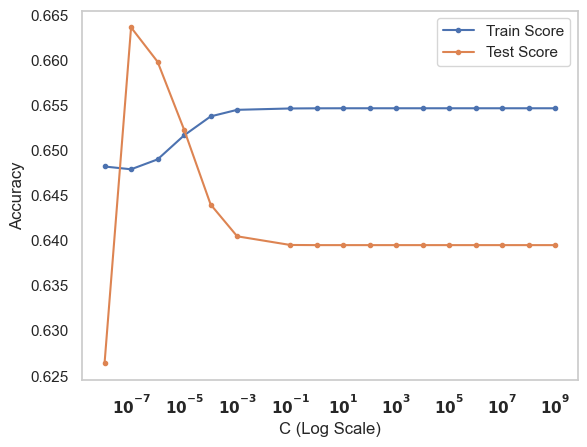

In [81]:
C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, .1,
                   1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])


# Lists to store training and testing scores
train_scores = []
test_scores = []

# Iterate over different values of C
for C_value in C_range:
    # Initialize Logistic Regression model with the current C value
    model = LogisticRegression(C=C_value, random_state=10)

    # Fit the model on the resampled training set
    model.fit(X_train_resampled, y_train_resampled)

     # Make predictions on the training set
    y_train_pred = model.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = model.predict(X_test_scaled)

    # Append testing scores to the respective list
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plotting results
plt.figure()
plt.plot(C_range, train_scores, label='Train Score', marker='.')
plt.plot(C_range, test_scores, label='Test Score', marker='.')
plt.xlabel('C (Log Scale)')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.grid()
plt.legend()
plt.show()

In [ ]:
# y' is output variable
class_counts = np.bincount(y_train_resampled)
class_0_count = class_counts[0]  # Count of class 0
class_1_count = class_counts[1]  # Count of class 1

print(f"Percentage of Class 0 : {class_0_count * 100 /(class_0_count+class_1_count)}")
print(f"Percentage of Class 1 : {class_1_count * 100 /(class_0_count+class_1_count)}")

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Lists to store training and testing scores
train_scores = []
test_scores = []

# Range of values for max_depth
max_depth_range = [2, 5, 10, 15, 20, 25, None]

# Iterate over different values of max_depth
for depth in max_depth_range:
    # Initialize Decision Tree Classifier with the current max_depth value
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=10)
    
    # Fit the model on the training set
    dt_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = dt_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = dt_classifier.predict(X_test_scaled)
    
    # Append training and testing scores to the respective lists
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plotting results
plt.figure()
plt.plot(max_depth_range, train_scores, label='Train Score', marker='o')
plt.plot(max_depth_range, test_scores, label='Test Score', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Set up the figure with size
plt.figure(figsize = (20,20))

# Draw the heatmap with the mask
sns.heatmap(data = processed_df.corr(), cmap="coolwarm", annot=True,fmt='.1f')

# plt.show()


### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

train_scores = []
test_scores = []

# Range of values for n_estimators
n_estimators_range = [1, 10, 50, 100, 150,200,300]

# Iterate over different values of n_estimators
for n_estimators in n_estimators_range:
    # Initialize XGBoost Classifier with the current n_estimators value
    xgb_classifier = XGBClassifier(n_estimators=n_estimators, random_state=100)
    
    # Fit the model on the training set
    xgb_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = xgb_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = xgb_classifier.predict(X_test_scaled)
    
    # Append training and testing scores to the respective lists
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plotting results
plt.figure()
plt.plot(n_estimators_range, train_scores, label='Train Score', marker='o')
plt.plot(n_estimators_range, test_scores, label='Test Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('XGBoost Performance')
plt.grid(True)
plt.legend()
plt.show()

### Catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_scores = []
test_scores = []

# Range of values for n_estimators
n_estimators_range = [1, 10, 50, 100, 150, 200, 300]

# Iterate over different values of n_estimators
for n_estimators in n_estimators_range:
    # Initialize CatBoost Classifier with the current n_estimators value
    cat_classifier = CatBoostClassifier(n_estimators=n_estimators, random_state=100, verbose=0)
    
    # Fit the model on the training set
    cat_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = cat_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = cat_classifier.predict(X_test_scaled)
    
    # Append training and testing scores to the respective lists
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plotting results
plt.figure()
plt.plot(n_estimators_range, train_scores, label='Train Score', marker='o')
plt.plot(n_estimators_range, test_scores, label='Test Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('CatBoost Performance')
plt.grid(True)
plt.legend()
plt.show()

### Pipleline and GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, recall_score

# Splitting data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Define a custom scorer for recall since you want to maximize it
recall_scorer = make_scorer(recall_score, pos_label=1)

# Models and their respective hyperparameters
models = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'param_grid': {'C': [0.01, 0.1, 1, 10, 50, 100]},
    },
    {
        'name': 'XGBoost',
        'model': XGBClassifier(),
        'param_grid': {'n_estimators': [1, 10, 50, 100]},
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [2, 5, 10, 15, 20]},
    }
#    {
#        'name': 'Neural Network',
#        'model': MLPClassifier(),
#        'param_grid': {'hidden_layer_sizes': [(100,), (50, 50), (20, 10)],
#                       'alpha': [0.0001, 0.001, 0.01]}
#    }
]

# Loop through the models and perform hyperparameter tuning with GridSearchCV
best_models = []
for model_info in models:
    model_name = model_info['name']
    model = model_info['model']
    param_grid = model_info['param_grid']

    # Create GridSearchCV object with 5-fold cross-validation and recall scoring
    grid_search = GridSearchCV(
        model, param_grid, cv=5, scoring=recall_scorer, n_jobs=-1)
    
    # Fit the GridSearchCV object on the training data
    grid_search.fit(X_train, y_train)

    # Find the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_recall = grid_search.best_score_

    print(f"Best {model_name} Hyperparameters: {best_params}")
    print(f"Best {model_name} Recall Score: {best_recall}")

    # Store the best model for later evaluation
    best_models.append((model_name, best_model))

# You can now evaluate the best models on the validation set or test set

In [ ]:
print(best_models)

In [ ]:
best_models

## Advanced Modeling with Recall Score


### Recall Scores with best models from GridSearchCV

In [ ]:
from sklearn.metrics import recall_score

# Create a list to store the recall scores for each model
recall_scores = []

# Loop through the best models
for model_name, best_model in best_models:
    # Fit the best model on the entire training dataset
    best_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate the recall score on the test set
    recall = recall_score(y_test, y_pred)
    
    # Append the recall score to the list
    recall_scores.append((model_name, recall))

# Sort the models by their recall scores in descending order
recall_scores.sort(key=lambda x: x[1], reverse=True)

# Print the best model and its recall score on the test set
best_model_name, best_recall = recall_scores[0]
print(f"Best Model: {best_model_name}")
print(f"Recall Score on Test Set: {best_recall}")

In [ ]:
recall_scores

In [ ]:
from sklearn.metrics import recall_score

# Create a list to store the recall scores for the minority class for each model
minority_recall_scores = []

# Loop through the best models
for model_name, best_model in best_models:
    # Fit the best model on the entire training dataset
    best_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate the recall score for the minority class on the test set
    minority_recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Append the minority recall score to the list
    minority_recall_scores.append((model_name, minority_recall))

# Sort the models by their minority recall scores in descending order
minority_recall_scores.sort(key=lambda x: x[1], reverse=True)

# Print the best model and its minority recall score on the test set
best_model_name, best_minority_recall = minority_recall_scores[0]
print(f"Best Model for Minority Recall: {best_model_name}")
print(f"Minority Recall Score on Test Set: {best_minority_recall}")

In [ ]:
minority_recall_scores

### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score
import matplotlib.pyplot as plt

# Initialize empty lists to store scores
train_recall_scores = []
test_recall_scores = []
train_accuracy_scores = []
test_accuracy_scores = []

# Range of values for n_estimators
n_estimators_range = [1,2,3,4,5,6,7,8]


# Iterate over different values of n_estimators
for n_estimators in n_estimators_range:
    # Initialize XGBoost Classifier with the current n_estimators value
    xgb_classifier = XGBClassifier(n_estimators=n_estimators, max_depth = 3, min_child_weight = 20, gamma = 5, subsample = 0.7, reg_lambda = 10, reg_alpha =4  ,random_state=1)
    
    # Fit the model on the training set
    xgb_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = xgb_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = xgb_classifier.predict(X_test_scaled)
    
    # Calculate and append training and testing recall scores
    train_recall = recall_score(y_train_resampled, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_recall_scores.append(train_recall)
    test_recall_scores.append(test_recall)
    
    # Calculate and append training and testing accuracy scores
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plotting results
plt.figure(figsize=(10, 6))

# Plot Recall Scores
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, train_recall_scores, label='Train Recall', marker='o')
plt.plot(n_estimators_range, test_recall_scores, label='Test Recall', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Recall Score')
plt.title('XGBoost Recall Performance')
plt.grid(True)
plt.legend()

# Plot Accuracy Scores
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, train_accuracy_scores, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, test_accuracy_scores, label='Test Accuracy', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy Performance')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, accuracy_score
import matplotlib.pyplot as plt

# Initialize empty lists to store scores
train_recall_scores = []
test_recall_scores = []
train_accuracy_scores = []
test_accuracy_scores = []

# Range of values for n_estimators
n_estimators_range = [1,2,4,5,5,6,7,8,9, 10,20,30,40]

# Iterate over different values of n_estimators
for n_estimators in n_estimators_range:
    # Initialize CatBoost Classifier with the current n_estimators value
    cat_classifier = CatBoostClassifier(n_estimators=n_estimators, depth = 4, l2_leaf_reg = 5.0, learning_rate= 0.01 , subsample= 0.7, early_stopping_rounds= 20,   random_state=100, verbose=0)
    
    # Fit the model on the training set
    cat_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = cat_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = cat_classifier.predict(X_test_scaled)
    
    # Calculate and append training and testing recall scores
    train_recall = recall_score(y_train_resampled, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_recall_scores.append(train_recall)
    test_recall_scores.append(test_recall)
    
    # Calculate and append training and testing accuracy scores
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plotting results
plt.figure(figsize=(12, 6))

# Plot Recall Scores
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, train_recall_scores, label='Train Recall', marker='o')
plt.plot(n_estimators_range, test_recall_scores, label='Test Recall', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Recall Score')
plt.title('CatBoost Recall Performance')
plt.grid(True)
plt.legend()

# Plot Accuracy Scores
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, train_accuracy_scores, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, test_accuracy_scores, label='Test Accuracy', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('CatBoost Accuracy Performance')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_accuracy_scores

In [ ]:
test_recall_scores

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, accuracy_score
import matplotlib.pyplot as plt

# Initialize empty lists to store scores
train_recall_scores = []
test_recall_scores = []
train_accuracy_scores = []
test_accuracy_scores = []

# Range of values for max_depth
max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8,20]

# Iterate over different values of max_depth
for max_depth in max_depth_range:
    # Initialize Decision Tree Classifier with the current max_depth value
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    
    # Fit the model on the training set
    dt_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = dt_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = dt_classifier.predict(X_test_scaled)
    
    # Calculate and append training and testing recall scores
    train_recall = recall_score(y_train_resampled, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_recall_scores.append(train_recall)
    test_recall_scores.append(test_recall)
    
    # Calculate and append training and testing accuracy scores
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plotting results
plt.figure(figsize=(10, 6))

# Plot Recall Scores
plt.subplot(1, 2, 1)
plt.plot(max_depth_range, train_recall_scores, label='Train Recall', marker='o')
plt.plot(max_depth_range, test_recall_scores, label='Test Recall', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Recall Score')
plt.title('Decision Tree Recall Performance')
plt.grid(True)
plt.legend()

# Plot Accuracy Scores
plt.subplot(1, 2, 2)
plt.plot(max_depth_range, train_accuracy_scores, label='Train Accuracy', marker='o')
plt.plot(max_depth_range, test_accuracy_scores, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy Performance')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_recall_scores

### Logistic Regression

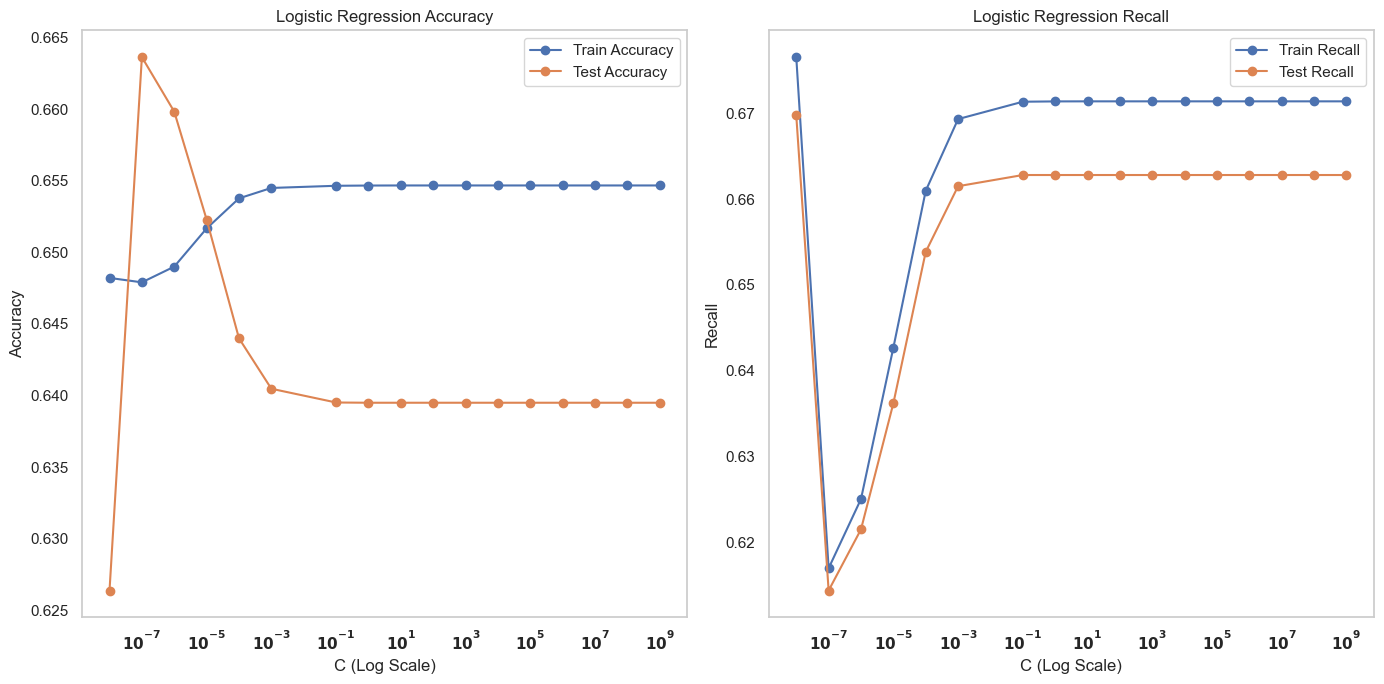

In [85]:
#
C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, .1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])

# Lists to store scores
train_accuracy_scores = []
test_accuracy_scores = []
train_recall_scores = []
test_recall_scores = []

# Iterate over different values of C
for C_value in C_range:
    # Initialize Logistic Regression model with the current C value
    model = LogisticRegression(C=C_value, random_state=100)

    # Fit the model on the resampled training set
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test_scaled)

    # Append accuracy and recall scores to the respective lists
    train_accuracy_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_accuracy_scores.append(accuracy_score(y_test, y_test_pred))
    train_recall_scores.append(recall_score(y_train_resampled, y_train_pred))
    test_recall_scores.append(recall_score(y_test, y_test_pred))

# Plotting results
plt.figure(figsize=(14, 7))

# Plot Accuracy Scores
plt.subplot(1, 2, 1)
plt.plot(C_range, train_accuracy_scores, label='Train Accuracy', marker='o')
plt.plot(C_range, test_accuracy_scores, label='Test Accuracy', marker='o')
plt.xlabel('C (Log Scale)')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.title('Logistic Regression Accuracy')
plt.grid()
plt.legend()

# Plot Recall Scores
plt.subplot(1, 2, 2)
plt.plot(C_range, train_recall_scores, label='Train Recall', marker='o')
plt.plot(C_range, test_recall_scores, label='Test Recall', marker='o')
plt.xlabel('C (Log Scale)')
plt.ylabel('Recall')
plt.xscale("log")
plt.title('Logistic Regression Recall')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


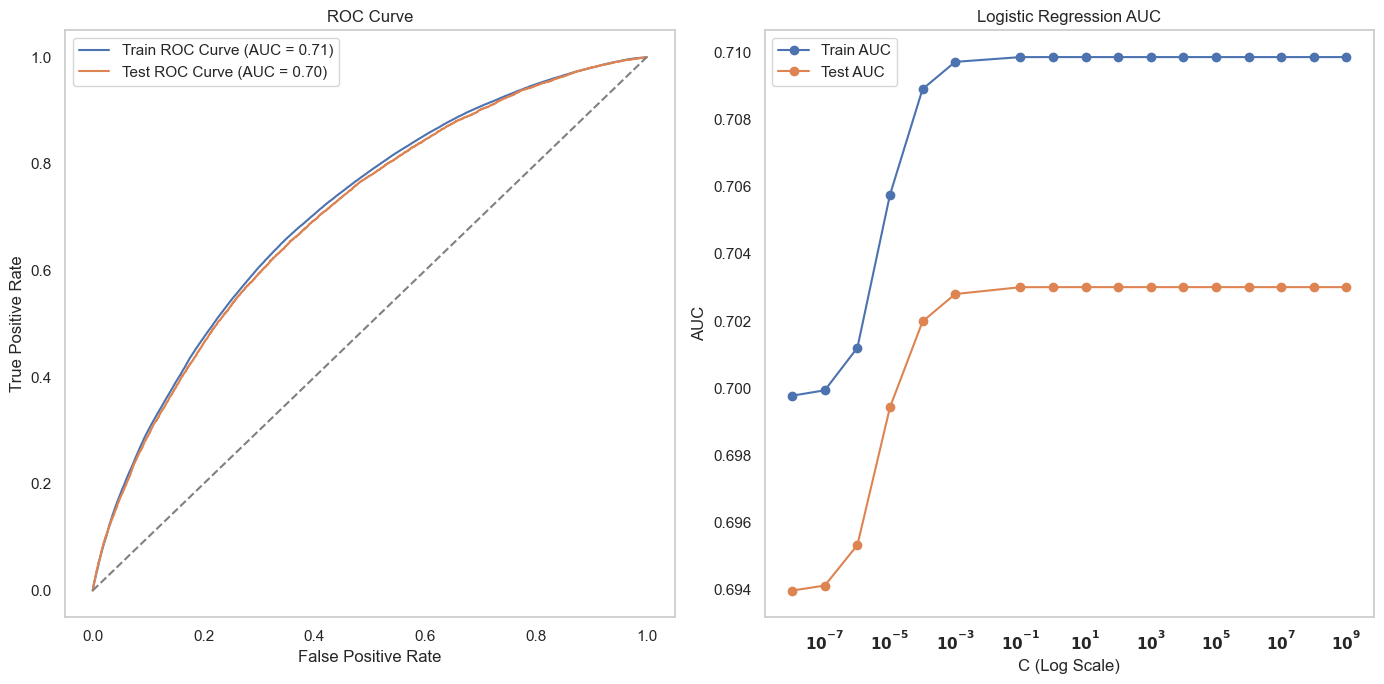

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

# Lists to store AUC scores
train_auc_scores = []
test_auc_scores = []

# Iterate over different values of C
for C_value in C_range:
    # Initialize Logistic Regression model with the current C value
    model = LogisticRegression(C=C_value, random_state=100)

    # Fit the model on the resampled training set
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the training and testing sets
    y_train_pred_proba = model.predict_proba(X_train_resampled)[:, 1]
    y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate ROC curve and AUC for training set
    fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_train_pred_proba)
    train_auc = roc_auc_score(y_train_resampled, y_train_pred_proba)
    train_auc_scores.append(train_auc)

    # Calculate ROC curve and AUC for testing set
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
    test_auc = roc_auc_score(y_test, y_test_pred_proba)
    test_auc_scores.append(test_auc)

# Plotting results
plt.figure(figsize=(14, 7))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = {:.2f})'.format(train_auc_scores[-1]))
plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(test_auc_scores[-1]))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend()

# Plot AUC Scores
plt.subplot(1, 2, 2)
plt.plot(C_range, train_auc_scores, label='Train AUC', marker='o')
plt.plot(C_range, test_auc_scores, label='Test AUC', marker='o')
plt.xlabel('C (Log Scale)')
plt.ylabel('AUC')
plt.xscale("log")
plt.title('Logistic Regression AUC')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [86]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': np.array([.00000001, .0000001, .000001, .00001, .0001, .001, .1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]),
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400],
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=100)

# Grid search cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Initialize Logistic Regression model with best parameters
best_log_reg = LogisticRegression(**best_params, random_state=100)

# Fit the model on the resampled training set
best_log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the training and testing sets
y_train_pred = best_log_reg.predict(X_train_resampled)
y_test_pred = best_log_reg.predict(X_test_scaled)

# Compute accuracy and recall scores
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Display scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)


Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Train Accuracy: 0.6546777515967931
Test Accuracy: 0.63962687448341
Train Recall: 0.6713051467864076
Test Recall: 0.6628998609179416


### Model Coefficients - Logistics Regression

In [ ]:
coefficients = model.coef_[0]

In [ ]:
print(coefficients)

In [ ]:
# Get coefficients and feature names
coefficients = model.coef_[0]
feature_names = X_train_resampled.columns

# Pair coefficients with feature names and create a DataFrame
feature_importance_df = pd.DataFrame(list(zip(feature_names, coefficients)), columns=['Feature', 'Coefficient'])

# Sort the DataFrame by the absolute value of the coefficients
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

# Drop the absolute value column and round the coefficients
feature_importance_df.drop(columns=['Abs_Coefficient'], inplace=True)
feature_importance_df['Coefficient'] = feature_importance_df['Coefficient'].round(decimals=2)

# Display the DataFrame
print(feature_importance_df)

In [ ]:
# Get coefficients and feature names
coefficients = model.coef_[0]
feature_names = X_train_resampled.columns

# List of log-transformed features
log_transformed_features = ['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'revol_bal', 'revol_util', 'mort_acc']

# Pair coefficients with feature names and create a DataFrame
feature_importance_df = pd.DataFrame(list(zip(feature_names, coefficients)), columns=['Feature', 'Coefficient'])

# Mark log-transformed features
feature_importance_df['Transformed'] = feature_importance_df['Feature'].apply(lambda x: 'Log' if x in log_transformed_features else 'None')

# Sort the DataFrame by the absolute value of the coefficients
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

# Drop the absolute value column and round the coefficients
feature_importance_df.drop(columns=['Abs_Coefficient'], inplace=True)
feature_importance_df['Coefficient'] = feature_importance_df['Coefficient'].round(decimals=2)

# Display the DataFrame
print(feature_importance_df)

In [ ]:
# Get coefficients and feature names
coefficients = model.coef_[0]
feature_names = X_train_resampled.columns

# List of log-transformed features
log_transformed_features = ['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'revol_bal', 'revol_util', 'mort_acc']

# Pair coefficients with feature names and create a DataFrame
feature_importance_df = pd.DataFrame(list(zip(feature_names, coefficients)), columns=['Feature', 'Coefficient'])

# Calculate Odds Ratios and add to the DataFrame
feature_importance_df['Odds Ratio'] = np.exp(feature_importance_df['Coefficient']).round(decimals=2)

# Mark log-transformed features
feature_importance_df['Transformed'] = feature_importance_df['Feature'].apply(lambda x: 'Log' if x in log_transformed_features else 'None')

# Sort the DataFrame by the absolute value of the coefficients
feature_importance_df.sort_values(by='Odds Ratio', ascending=False, inplace=True)

# Display the DataFrame
print(feature_importance_df[['Feature', 'Coefficient', 'Odds Ratio', 'Transformed']])

### Neural Networks

In [ ]:
import tensorflow as tf
from sklearn.metrics import recall_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Custom Callback for Recall
class RecallCallback(tf.keras.callbacks.Callback):
    def __init__(self, train_data, train_labels, test_data, test_labels):
        super(RecallCallback, self).__init__()
        self.train_data = train_data
        self.train_labels = train_labels
        self.test_data = test_data
        self.test_labels = test_labels
        self.train_recall = []
        self.test_recall = []

    def on_epoch_end(self, epoch, logs=None):
        train_predictions = (self.model.predict(self.train_data) > 0.5).astype("int32")
        test_predictions = (self.model.predict(self.test_data) > 0.5).astype("int32")
        self.train_recall.append(recall_score(self.train_labels, train_predictions))
        self.test_recall.append(recall_score(self.test_labels, test_predictions))

# Function to create a less complex neural network model
def create_model(num_features):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(num_features,)),  # Fewer neurons
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

#  num_features is the number of features in input data
num_features = X_train_resampled.shape[1]

# Create and train the model
model = create_model(num_features)
recall_callback = RecallCallback(X_train_resampled, y_train_resampled, X_test_scaled, y_test)
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, validation_data=(X_test_scaled, y_test), verbose=0, callbacks=[recall_callback])

# Plotting results
plt.figure(figsize=(12, 5))

# Plot Recall
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), recall_callback.train_recall, label='Train Recall', marker='o')
plt.plot(range(1, 11), recall_callback.test_recall, label='Test Recall', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Recall Score')
plt.title('Neural Network Recall Performance')
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(range(1, 11), history.history.get('val_accuracy', []), label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Neural Network Accuracy Performance')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion

**Below table shows comparison of accuracies in various models**

| Model                     | Best Accuracy Score |
|---------------------------|---------------------|
| Logistic Regression       | 67.10%              |
| Decision Trees            | 68.00%              |
| XGBoost                   | 66.90%              |
| CatBoost                  | 63.00%              |
| Neural Networks           | 67.70%              |


* Among the models considered for loan default prediction, Decision Trees demonstrate the highest accuracy at 68.00%, closely followed by Logistic Regression and Neural Networks, both achieving almost equal accuracy levels.

* Considering recall scores for loan prediction, as opposed to solely focusing on accuracy, is crucial for several reasons:

* Accuracy measures the proportion of true results (both true positives and true negatives) among the total number of cases examined. It's a general measure of how often the model is correct.

* Recall measures the proportion of actual positives (e.g., defaulters) that are correctly identified. It specifically focuses on the model's ability to detect defaulted cases.

**Importance of Recall in Loan Prediction:**

* Mitigating Financial Risks: In loan prediction, missing a potential defaulter (a false negative) can be costlier than wrongly identifying a non-defaulter as a defaulter (a false positive). Recall emphasizes reducing these false negatives.
* Regulatory Compliance: Financial institutions often face regulatory requirements to manage and minimize credit risks effectively. High recall ensures that risky loans are identified more accurately.
* Balancing Profit and Risk: While accuracy provides an overall effectiveness of the model, recall specifically helps in balancing the portfolio's risk by accurately identifying higher-risk loans.

**Limitations of Accuracy:**

**Imbalanced Datasets:** Loan datasets often have more non-defaulters than defaulters. In such scenarios, a model might appear highly accurate by predominantly predicting the majority class (non-defaulters) while failing to correctly identify the critical minority class (defaulters).
**Misleading Performance Metrics:** High accuracy might give a false sense of security about the model's performance. It doesn't reflect how well the model is capturing the critical cases of defaulters.


**Comparison of Recall scores for different models**

| Model                     | Best Recall Score | Hyperparameter   |
|---------------------------|-------------------|------------------|
| Logistic Regression       | 66.20%            | C = 0.1          |
| Decision Trees            | 71.40%            | Max depth = 2    |
| XGBoost                   | 60.50%            | Estimators = 3   |
| CatBoost                  | 63.00%            | Estimators = 7   |
| Neural Networks           | 67.70%            | Epochs = 5       |

The table presents the performance results of different models along with their respective best recall scores and hyperparameters.
* Logistic Regression, with a hyperparameter value of C = 0.1, achieved a recall score of 66.20%.
* Decision Trees with a maximum depth of 2 obtained a higher recall score of 71.40%.
* XGBoost with 3 estimators achieved a recall score of 60.50%.
* CatBoost with 7 estimators obtained a recall score of 63.00%.
* Neural Networks with 5 epochs achieved a recall score of 67.70%.
* The best recall score indicates the model's ability to correctly identify positive cases or 'True Positives' in the classification task.
* The results suggest that Decision Trees achieved the highest recall score among the models listed, making it a favorable choice for this classification task.

**Best Model**

- We can save the best model in the form of a pkl file.

In this case, we have Decision trees as the best performing model. We import joblib to dump the model.
DecisionTreeClassifier


In [ ]:
# save the model using `joblib`
import joblib

#best_model = DecisionTreeClassifier(max_depth=2, random_state=1)

best_model = LogisticRegression(C=0.1,random_state=10)

# Fit the model on the training set
best_model.fit(X_train_resampled, y_train_resampled)

# saving as pkl file
model_LR = 'best_model.pkl'

# Save the model to a .pkl file
joblib.dump(best_model, 'C:/Users/botch_yp7a42y/OneDrive/Desktop/Learning/mygitrepo/best_model.pkl')

In [ ]:
X_train_resampled.info()

In [ ]:
X_train_resampled.head(1)

In [ ]:
best_model.predict(X_train_resampled.head(3))

In [ ]:
type(X_train_resampled)

In [ ]:
X_train_resampled.loc[2]

In [ ]:
type(X_train_resampled.loc[2])

In [ ]:
list(X_train_resampled.iloc[8])

## Next Steps

* The next steps involve refining the model through advanced hyperparameter tuning. 
* In this project, we performed limited hyperparameter tuning. 
* We can experiment with adjusting the classification thresholds. 
* A challenge encountered was the excessive complexity of the models in relation to my dataset, necessitating the simplification of models by adjusting various hyperparameters. 
* Further analysis could include examining time series and geographic data. 
* There's also scope for enhanced feature engineering. 
* Additionally, developing a credit scoring model is another avenue to explore.
* Developing a web app for demonstrating prediction of loan performance over the tenor.

In [ ]:
demo_series = [10000,8.2,80000,2,10,0,10000,4000,1,0,1,2015,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0]

demo_series = [40000,16.2,8000,2,10,0,10000,4000,1,0,1,2015,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0]

demo_df = pd.DataFrame([demo_series])

demo_scaled = scaler.transform(demo_df)

print(type(demo_scaled))

print(demo_scaled)

demo_scaled_df = pd.DataFrame(demo_scaled)

best_model.predict(demo_scaled_df)

In [ ]:
type(X_test)

In [ ]:
best_model.predict(pd.DataFrame([[0.7514535962915077,
 1.010561656351036,
 0.16787863949863432,
 0.2713714846956284,
 -0.6465793955220825,
 -0.33351936644141356,
 -0.05879364730750862,
 0.2209717290090922,
 0.7871963523535884,
 -0.3421417278860765,
 -0.16131317973093673,
 0.9288598606160049,
 1.7894822236630024,
 -0.644031932555057,
 -0.6046983657175465,
 -0.4368042075193865,
 3.3963794122099005,
 -0.1747348477552755,
 -0.08804297764335842,
 0.9977580380522357,
 -0.00827466674979133,
 -0.016187133663903164,
 -0.3243088602180947,
 -0.8222437583272116,
 1.226215047108293,
 0.04254600517995226,
 -0.033115677123226765],[-0.2142951410515851,
 -0.42540436747793614,
 -0.46957120135808256,
 0.2742026543845117,
 0.13257200721902218,
 -0.33351936644141356,
 0.20246654449774937,
 0.20185547183434752,
 0.6657791972519614,
 -0.3421417278860765,
 -0.16131317973093673,
 -0.4361155165046951,
 -0.5588208626923589,
 1.552718039977796,
 -0.6046983657175465,
 -0.4368042075193865,
 -0.2944311805698222,
 -0.1747348477552755,
 -0.08804297764335842,
 0.9977580380522357,
 -0.00827466674979133,
 -0.016187133663903164,
 -0.3243088602180947,
 -0.8222437583272116,
 -0.8155176388988521,
 0.04254600517995226,
 -0.033115677123226765], [0.805792803689083,
 -1.4288645671457911,
 -0.029233557516298178,
 -0.4872143699372647,
 0.5221477085895746,
 1.5339267039431508,
 0.3507801199419697,
 -0.10626794187873878,
 -1.3509160965328586,
 2.465668788765615,
 -0.7451096176096544,
 0.9288598606160049,
 -0.5588208626923589,
 -0.644031932555057,
 -0.6046983657175465,
 -0.4368042075193865,
 -0.2944311805698222,
 -0.1747348477552755,
 -0.08804297764335842,
 -1.0022469996354437,
 -0.00827466674979133,
 -0.016187133663903164,
 -0.3243088602180947,
 1.2161843612342147,
 1.226215047108293,
 0.04254600517995226,
 -0.033115677123226765] , [ 1.45790689e+03,  7.68922528e+00,  1.51539790e+05, -1.80829397e+00,
  -2.01009435e+00, -3.33519366e-01,  4.07812316e+03,  1.53396816e-01,
   7.53363161e-01, -3.42141728e-01, -1.62080427e+00,  9.28859861e-01,
   1.78948222e+00, -6.44031933e-01, -6.04698366e-01, -4.36804208e-01,
  -2.94431181e-01, -1.74734848e-01, -8.80429776e-02, -1.00224700e+00,
   1.20850788e+02, -1.61871337e-02, -3.24308860e-01, -8.22243758e-01,
   1.22621505e+00,  4.25460052e-02, -3.31156771e-02]   ]))

In [ ]:
best_model.predict_proba(pd.DataFrame([[0.7514535962915077,
 1.010561656351036,
 0.16787863949863432,
 0.2713714846956284,
 -0.6465793955220825,
 -0.33351936644141356,
 -0.05879364730750862,
 0.2209717290090922,
 0.7871963523535884,
 -0.3421417278860765,
 -0.16131317973093673,
 0.9288598606160049,
 1.7894822236630024,
 -0.644031932555057,
 -0.6046983657175465,
 -0.4368042075193865,
 3.3963794122099005,
 -0.1747348477552755,
 -0.08804297764335842,
 0.9977580380522357,
 -0.00827466674979133,
 -0.016187133663903164,
 -0.3243088602180947,
 -0.8222437583272116,
 1.226215047108293,
 0.04254600517995226,
 -0.033115677123226765],[-0.2142951410515851,
 -0.42540436747793614,
 -0.46957120135808256,
 0.2742026543845117,
 0.13257200721902218,
 -0.33351936644141356,
 0.20246654449774937,
 0.20185547183434752,
 0.6657791972519614,
 -0.3421417278860765,
 -0.16131317973093673,
 -0.4361155165046951,
 -0.5588208626923589,
 1.552718039977796,
 -0.6046983657175465,
 -0.4368042075193865,
 -0.2944311805698222,
 -0.1747348477552755,
 -0.08804297764335842,
 0.9977580380522357,
 -0.00827466674979133,
 -0.016187133663903164,
 -0.3243088602180947,
 -0.8222437583272116,
 -0.8155176388988521,
 0.04254600517995226,
 -0.033115677123226765], [0.805792803689083,
 -1.4288645671457911,
 -0.029233557516298178,
 -0.4872143699372647,
 0.5221477085895746,
 1.5339267039431508,
 0.3507801199419697,
 -0.10626794187873878,
 -1.3509160965328586,
 2.465668788765615,
 -0.7451096176096544,
 0.9288598606160049,
 -0.5588208626923589,
 -0.644031932555057,
 -0.6046983657175465,
 -0.4368042075193865,
 -0.2944311805698222,
 -0.1747348477552755,
 -0.08804297764335842,
 -1.0022469996354437,
 -0.00827466674979133,
 -0.016187133663903164,
 -0.3243088602180947,
 1.2161843612342147,
 1.226215047108293,
 0.04254600517995226,
 -0.033115677123226765] , [ 5.88532638e+04,  3.96886078e+01,  1.51351081e+04, -7.36130629e-01,
  -2.57003694e-01, -3.33519366e-01,  4.07812316e+03,  1.88669317e+03,
   7.53363161e-01, -3.42141728e-01, -1.62080427e+00 , 9.28859861e-01,
   1.78948222e+00, -6.44031933e-01, -6.04698366e-01, -4.36804208e-01,
  -2.94431181e-01,  5.72295688e+00, -8.80429776e-02, -1.00224700e+00,
   1.20850788e+02, -1.61871337e-02, -3.24308860e-01, -8.22243758e-01,
   1.22621505e+00,  4.25460052e-02, -3.31156771e-02]   ]))

In [ ]:
# Sample correlation matrix
data = np.array([[1, 0.5, -0.2], [0.5, 1, 0.4], [-0.2, 0.4, 1]])

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()